### Problem Statement:
#### Case study is designed to find patterns or driving factors that dictate whether a loan default would occur. The variables that are chosen by the end of the study should be strong indicators of default. This will ensure two things, a) consumers with a good track record, those who will be able to repay the loan are not rejected, b) narrow down probable loan defaulters and judge a loan payer in such a way that the risk is covered (in terms of loan value reduction, increased interest rate, etc.)
#### This would help companies design their portfolio and risk assessment.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading data from application and previous application .csv files and basic analysis

In [2]:
App = pd.read_csv('application_data.csv')
PrvApp = pd.read_csv('previous_application.csv')

In [3]:
App.shape

(307511, 122)

In [4]:
PrvApp.shape

(1670214, 37)

Let's work on the dataframe 'application_data'

In [5]:
App.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
App.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
App.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
App.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
len(App)

307511

In [10]:
App.isna().sum().sort_values(ascending=False).head(122)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

In [11]:
PrvApp.shape

(1670214, 37)

In [12]:
PrvApp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [13]:
PrvApp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
PrvApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

So after taking a look at both the datasets, let's manipulate the 'application_data' dataframe

### Further analysis of the datasets

In [15]:
App.isna().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [16]:
PrvApp.isna().sum().sort_values(ascending=False).head(40)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
RATE_DOWN_PAYMENT               895844
AMT_DOWN_PAYMENT                895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [17]:
App.shape

(307511, 122)

In [18]:
x=len(App)/2
x

153755.5

Looking into null values in the dataset

In [19]:
App.columns[App.isnull().sum() < x]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [20]:
len(App.columns[App.isnull().sum() < x])

81

In [21]:
# removing the columns that have more than 50% null values
App = App[ App.columns[App.isnull().sum() < x] ]
App.shape

(307511, 81)

#### We began with 122 columns which is now cutdown to 81 columns

In [22]:
App.isna().sum().sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
NAME_TYPE_SUITE                   1292
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [23]:
App.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [24]:
# Categorical columns
list(set(App.columns) - set(App.describe().columns))

['CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [25]:
# Getting Numerical columns
App.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [26]:
App.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 81, dtype: int64

Imputing the missing values one step at a time

In [27]:
App_missing = App.count()/len(App)
App_missing

SK_ID_CURR                    1.000000
TARGET                        1.000000
NAME_CONTRACT_TYPE            1.000000
CODE_GENDER                   1.000000
FLAG_OWN_CAR                  1.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.864984
AMT_REQ_CREDIT_BUREAU_WEEK    0.864984
AMT_REQ_CREDIT_BUREAU_MON     0.864984
AMT_REQ_CREDIT_BUREAU_QRT     0.864984
AMT_REQ_CREDIT_BUREAU_YEAR    0.864984
Length: 81, dtype: float64

In [28]:
App_missing = (1-App_missing)*100
App_missing

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [29]:
App_missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

#### Treating columns with missing value percentage over 30
#### Starting with 'FLOORSMAX_AVG'

In [30]:
App['FLOORSMAX_AVG'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

In [31]:
App['FLOORSMAX_AVG'].mean()

0.2262819070368362

In [32]:
App['FLOORSMAX_AVG'].median()

0.1667

In [33]:
App['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

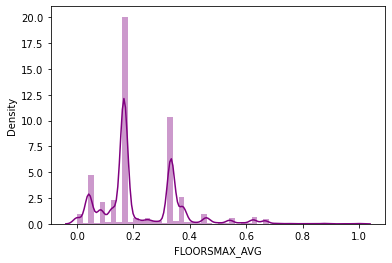

In [34]:
sns.distplot(App['FLOORSMAX_AVG'], color = 'purple')
plt.show()

#### Since mean and median are not the same, i.e. the distribution is skewed, missing values will be replaced by the median

In [35]:
App['FLOORSMAX_AVG'].fillna(App['FLOORSMAX_AVG'].median(), inplace=True)

In [36]:
App['FLOORSMAX_AVG'].isna().sum()

0

In [37]:
App_missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

#### Treating 'FLOORSMAX_MEDI'

In [38]:
App['FLOORSMAX_MEDI'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MEDI, dtype: float64

In [39]:
App['FLOORSMAX_MEDI'].mean()

0.22589659009280993

In [40]:
App['FLOORSMAX_MEDI'].median()

0.1667

In [41]:
App['FLOORSMAX_MEDI'].describe()

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

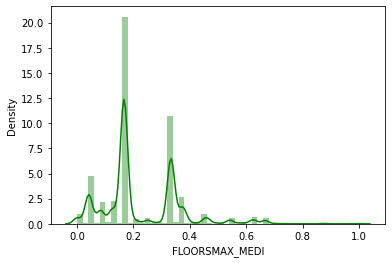

In [42]:
sns.distplot(App['FLOORSMAX_MEDI'], color = 'green')
plt.show()

Similar to the previous column, the distribution here is skewed

In [43]:
App['FLOORSMAX_MEDI'].fillna(App['FLOORSMAX_MEDI'].median(), inplace=True)


In [44]:
App['FLOORSMAX_MEDI'].isna().sum()

0

In [45]:
App_missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

#### Treating 'FLOORSMAX_MODE '

In [46]:
App['FLOORSMAX_MODE'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MODE, dtype: float64

In [47]:
App['FLOORSMAX_MODE'].mean()

0.22231504747867964

In [48]:
App['FLOORSMAX_MODE'].median()

0.1667

In [49]:
App['FLOORSMAX_MODE'].describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

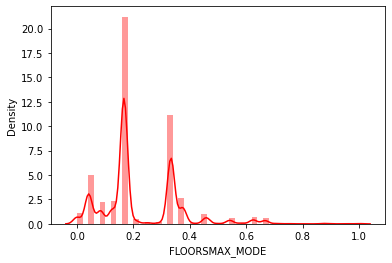

In [50]:
sns.distplot(App['FLOORSMAX_MODE'], color = 'red')
plt.show()

Skewed distribution here as well

In [51]:
App['FLOORSMAX_MODE'].fillna(App['FLOORSMAX_MODE'].median(), inplace=True)

In [52]:
App['FLOORSMAX_MODE'].isna().sum()

0

#### Treating 'YEARS_BEGINEXPLUATATION_AVG'

In [53]:
App['YEARS_BEGINEXPLUATATION_AVG'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [54]:
App['YEARS_BEGINEXPLUATATION_AVG'].mean()

0.9777348581622732

In [55]:
App['YEARS_BEGINEXPLUATATION_AVG'].median()

0.9816

In [56]:
App['YEARS_BEGINEXPLUATATION_AVG'].describe()

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

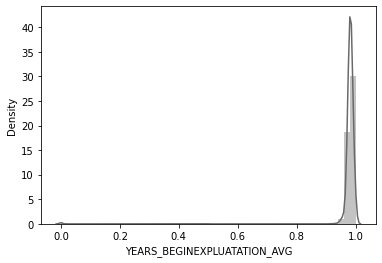

In [57]:
sns.distplot(App['YEARS_BEGINEXPLUATATION_AVG'], color = 'dimgray')
plt.show()

#### Since mean and median are almost the same, missing value will be replaced by mean

In [58]:
App['YEARS_BEGINEXPLUATATION_AVG'].fillna(App['YEARS_BEGINEXPLUATATION_AVG'].mean(), inplace=True)

In [59]:
App['YEARS_BEGINEXPLUATATION_AVG'].isna().sum()

0

#### Treating 'YEARS_BEGINEXPLUATATION_MEDI'

In [60]:
App['YEARS_BEGINEXPLUATATION_MEDI'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [61]:
App['YEARS_BEGINEXPLUATATION_MEDI'].mean()

0.9777522640694213

In [62]:
App['YEARS_BEGINEXPLUATATION_MEDI'].median()

0.9816

In [63]:
App['YEARS_BEGINEXPLUATATION_MEDI'].describe()

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

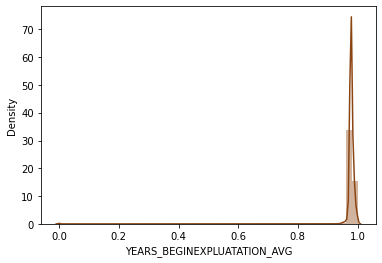

In [64]:
sns.distplot(App['YEARS_BEGINEXPLUATATION_AVG'], color = 'saddlebrown')
plt.show()

Similar to the last column the median is pretty close to the mean over here.

In [65]:
App['YEARS_BEGINEXPLUATATION_MEDI'].fillna(App['YEARS_BEGINEXPLUATATION_MEDI'].mean(), inplace=True)

In [66]:
App['YEARS_BEGINEXPLUATATION_MEDI'].isna().sum()

0

#### Treating 'YEARS_BEGINEXPLUATATION_MODE'

In [67]:
App['YEARS_BEGINEXPLUATATION_MODE'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [68]:
App['YEARS_BEGINEXPLUATATION_MODE'].mean()

0.9770653729428284

In [69]:
App['YEARS_BEGINEXPLUATATION_MODE'].median()

0.9816

In [70]:
App['YEARS_BEGINEXPLUATATION_MODE'].describe()

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

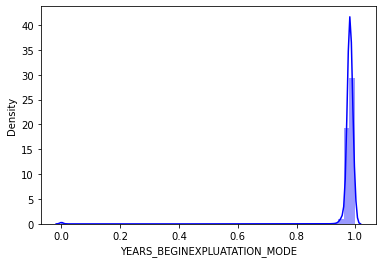

In [71]:
sns.distplot(App['YEARS_BEGINEXPLUATATION_MODE'], color = 'blue')
plt.show()

Median is again close to the mean over here.

In [72]:
App['YEARS_BEGINEXPLUATATION_MODE'].fillna(App['YEARS_BEGINEXPLUATATION_MODE'].mean(), inplace=True)

In [73]:
App['YEARS_BEGINEXPLUATATION_MODE'].isna().sum()

0

#### Treating 'TOTALAREA_MODE'

In [74]:
App['TOTALAREA_MODE'].head()

0    0.0149
1    0.0714
2       NaN
3       NaN
4       NaN
Name: TOTALAREA_MODE, dtype: float64

In [75]:
App['TOTALAREA_MODE'].mean()

0.10254666268544003

In [76]:
App['TOTALAREA_MODE'].median()

0.0688

In [77]:
App['TOTALAREA_MODE'].describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

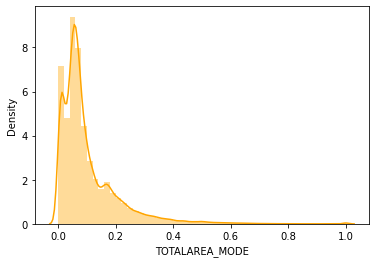

In [78]:
sns.distplot(App['TOTALAREA_MODE'], color = 'orange')
plt.show()

Median would be prefered over mean here as both are significantly different

In [79]:
App['TOTALAREA_MODE'].fillna(App['TOTALAREA_MODE'].median(), inplace=True)

In [80]:
App['TOTALAREA_MODE'].isna().sum()

0

#### Treating 'EMERGENCYSTATE_MODE'

In [81]:
App['EMERGENCYSTATE_MODE'].head()

0     No
1     No
2    NaN
3    NaN
4    NaN
Name: EMERGENCYSTATE_MODE, dtype: object

In [82]:
App['EMERGENCYSTATE_MODE'].describe()

count     161756
unique         2
top           No
freq      159428
Name: EMERGENCYSTATE_MODE, dtype: object

In [83]:
App_missing.sort_values(ascending=False).head(25)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

#### Treating 'OCCUPATION_TYPE '

In [84]:
App['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [85]:
App['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [86]:
App['OCCUPATION_TYPE'].isna().sum()

96391

In [87]:
App.shape

(307511, 81)

In [88]:
(96391/307511)*100

31.345545362604916

In [89]:
App['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

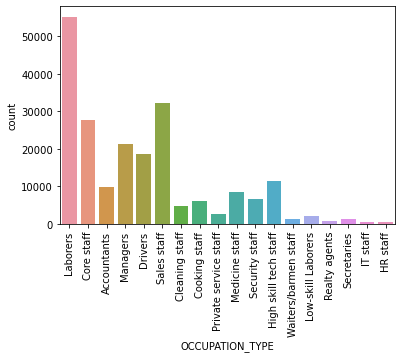

In [90]:
sns.countplot(x= 'OCCUPATION_TYPE', data=App)
plt.xticks(rotation=90)
plt.show()

As can be seen in the plot above, Laborers form the top most bracket of loan seeking clients, followed by sales staff. This might indicate that the most loan applicants come from a less paying job background.

#### Treating 'EXT_SOURCE_3'

In [91]:
App['EXT_SOURCE_3'].isna().sum()

60965

In [92]:
App['EXT_SOURCE_3'].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

In [93]:
App['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.018137       1
0.017017       1
0.858178       1
0.018924       1
0.024057       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

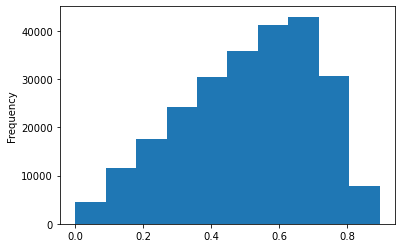

In [94]:
App['EXT_SOURCE_3'].plot.hist()
plt.show()

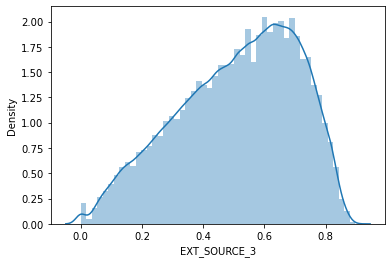

In [95]:
sns.distplot(App['EXT_SOURCE_3'])
plt.show()

In [96]:
App['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [97]:
App['EXT_SOURCE_3'].mean()

0.5108529061800121

In [98]:
App['EXT_SOURCE_3'].median()

0.5352762504724826

#### Looking at the mean and median value of 'EXT_SOURCE_3', the data can be said although looking to be almost similar, has a left/negative skewness to it to some extent (as mean is slightly left of median). But the data is almost following a normal distribution.

#### Treating 'AMT_REQ_CREDIT_BUREAU_YEAR '

In [99]:
App.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [100]:
App['AMT_REQ_CREDIT_BUREAU_YEAR'].head()

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [101]:
App.AMT_REQ_CREDIT_BUREAU_YEAR.unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [102]:
len(App.AMT_REQ_CREDIT_BUREAU_YEAR.unique())

26

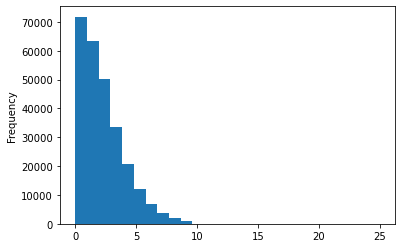

In [103]:
num_unique_values = len(App.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
App.AMT_REQ_CREDIT_BUREAU_YEAR.plot.hist(bins=num_unique_values)
plt.show()

In [104]:
App.AMT_REQ_CREDIT_BUREAU_YEAR.mean()

1.899974435321363

In [105]:
App.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

Since we're dealing with discrete values, the missing values have to be replaced with mode

In [106]:
App.AMT_REQ_CREDIT_BUREAU_YEAR.mode().iloc[0]

0.0

In [107]:
App.AMT_REQ_CREDIT_BUREAU_YEAR = App.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(App.AMT_REQ_CREDIT_BUREAU_YEAR.mode().iloc[0])

In [108]:
App.AMT_REQ_CREDIT_BUREAU_YEAR.isna().sum()

0

#### Treating 'AMT_REQ_CREDIT_BUREAU_QRT'

In [109]:
App.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [110]:
App['AMT_REQ_CREDIT_BUREAU_QRT'].head()


0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [111]:
len(App.AMT_REQ_CREDIT_BUREAU_QRT.unique())


12

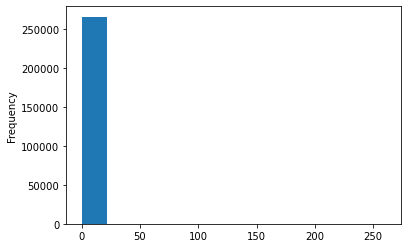

In [112]:
num_unique_values = len(App.AMT_REQ_CREDIT_BUREAU_QRT.unique())
App.AMT_REQ_CREDIT_BUREAU_QRT.plot.hist(bins=num_unique_values)
plt.show()


In [113]:
App.AMT_REQ_CREDIT_BUREAU_QRT.mean()


0.26547414959848414

In [114]:
App.AMT_REQ_CREDIT_BUREAU_QRT.mode()


0    0.0
dtype: float64

Again mode would be best as a substitution here

In [115]:
App.AMT_REQ_CREDIT_BUREAU_QRT.mode().iloc[0]


0.0

In [116]:
App.AMT_REQ_CREDIT_BUREAU_QRT = App.AMT_REQ_CREDIT_BUREAU_QRT.fillna(App.AMT_REQ_CREDIT_BUREAU_QRT.mode().iloc[0])


In [117]:
App.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

0

#### Treating 'AMT_REQ_CREDIT_BUREAU_HOUR'

In [118]:
App['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [119]:
App['AMT_REQ_CREDIT_BUREAU_HOUR'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [120]:
len(App.AMT_REQ_CREDIT_BUREAU_HOUR.unique())

6

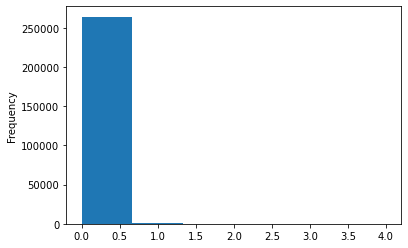

In [121]:
num_unique_values = len(App.AMT_REQ_CREDIT_BUREAU_HOUR.unique())
App.AMT_REQ_CREDIT_BUREAU_HOUR.plot.hist(bins=num_unique_values)
plt.show()

In [122]:
App.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

0.006402448193930645

In [123]:
App.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [124]:
App.AMT_REQ_CREDIT_BUREAU_HOUR.mode().iloc[0]

0.0

In [125]:
App.AMT_REQ_CREDIT_BUREAU_HOUR = App.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(App.AMT_REQ_CREDIT_BUREAU_HOUR.mode().iloc[0])

In [126]:
App.AMT_REQ_CREDIT_BUREAU_HOUR.isna().sum()

0

#### Treating 'AMT_REQ_CREDIT_BUREAU_DAY'

In [127]:
App['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [128]:
App['AMT_REQ_CREDIT_BUREAU_DAY'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [129]:
len(App.AMT_REQ_CREDIT_BUREAU_DAY.unique())

10

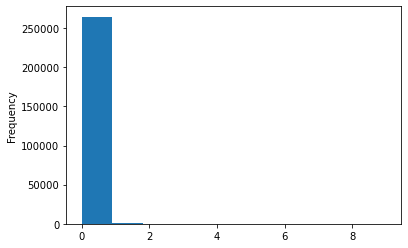

In [130]:
num_unique_values = len(App.AMT_REQ_CREDIT_BUREAU_DAY.unique())
App.AMT_REQ_CREDIT_BUREAU_DAY.plot.hist(bins=num_unique_values)
plt.show()

In [131]:
App.AMT_REQ_CREDIT_BUREAU_DAY.mean()

0.0070002105326475985

In [132]:
App.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [133]:
App.AMT_REQ_CREDIT_BUREAU_DAY.mode().iloc[0]

0.0

In [134]:
App.AMT_REQ_CREDIT_BUREAU_DAY = App.AMT_REQ_CREDIT_BUREAU_DAY.fillna(App.AMT_REQ_CREDIT_BUREAU_DAY.mode().iloc[0])

In [135]:
App.AMT_REQ_CREDIT_BUREAU_YEAR.isna().sum()

0

#### Treating 'AMT_REQ_CREDIT_BUREAU_WEEK'

In [136]:
App['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [137]:
App['AMT_REQ_CREDIT_BUREAU_WEEK'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [138]:
len(App.AMT_REQ_CREDIT_BUREAU_WEEK.unique())

10

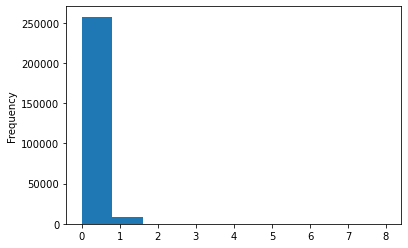

In [139]:
num_unique_values = len(App.AMT_REQ_CREDIT_BUREAU_WEEK.unique())
App.AMT_REQ_CREDIT_BUREAU_WEEK.plot.hist(bins=num_unique_values)
plt.show()

In [140]:
App.AMT_REQ_CREDIT_BUREAU_WEEK.mean()

0.0343619356973142

In [141]:
App.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [142]:
App.AMT_REQ_CREDIT_BUREAU_WEEK.mode().iloc[0]

0.0

In [143]:
App.AMT_REQ_CREDIT_BUREAU_WEEK = App.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(App.AMT_REQ_CREDIT_BUREAU_WEEK.mode().iloc[0])

In [144]:
App.AMT_REQ_CREDIT_BUREAU_WEEK.isna().sum()

0

#### Treating 'AMT_REQ_CREDIT_BUREAU_MON'

In [145]:
App['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [146]:
App['AMT_REQ_CREDIT_BUREAU_MON'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [147]:
len(App.AMT_REQ_CREDIT_BUREAU_MON.unique())

25

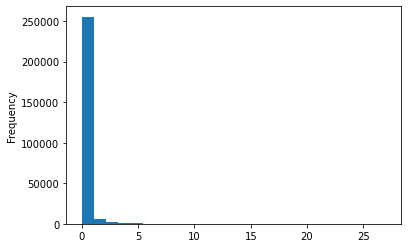

In [148]:
num_unique_values = len(App.AMT_REQ_CREDIT_BUREAU_MON.unique())
App.AMT_REQ_CREDIT_BUREAU_MON.plot.hist(bins=num_unique_values)
plt.show()

In [149]:
App.AMT_REQ_CREDIT_BUREAU_MON.mean()

0.26739526000781977

In [150]:
App.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [151]:
App.AMT_REQ_CREDIT_BUREAU_MON.mode().iloc[0]

0.0

In [152]:
App.AMT_REQ_CREDIT_BUREAU_MON = App.AMT_REQ_CREDIT_BUREAU_MON.fillna(App.AMT_REQ_CREDIT_BUREAU_MON.mode().iloc[0])

In [153]:
App.AMT_REQ_CREDIT_BUREAU_MON.isna().sum()

0

In [154]:
App_missing.sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [155]:
# Again looking at the categorical columns
list(set(App.columns) - set(App.describe().columns))

['CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [156]:
# Also looking at the numerical columns
App.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [157]:
cols = list(set(App.columns) - set(App.describe().columns))
App[cols] = App[cols].fillna(App.mode().iloc[0])

In [158]:
App[cols].isna().sum()

CODE_GENDER                   0
WEEKDAY_APPR_PROCESS_START    0
NAME_TYPE_SUITE               0
NAME_CONTRACT_TYPE            0
ORGANIZATION_TYPE             0
NAME_HOUSING_TYPE             0
NAME_INCOME_TYPE              0
FLAG_OWN_CAR                  0
NAME_FAMILY_STATUS            0
NAME_EDUCATION_TYPE           0
OCCUPATION_TYPE               0
FLAG_OWN_REALTY               0
EMERGENCYSTATE_MODE           0
dtype: int64

In [159]:
App.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [160]:
App[ App.describe().columns].isna().sum().tolist() 

[0,
 0,
 0,
 0,
 0,
 12,
 278,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 660,
 60965,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1021,
 1021,
 1021,
 1021,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [161]:
nulls = App.isnull().sum()
nulls[nulls>0]

AMT_ANNUITY                    12
AMT_GOODS_PRICE               278
CNT_FAM_MEMBERS                 2
EXT_SOURCE_2                  660
EXT_SOURCE_3                60965
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
DAYS_LAST_PHONE_CHANGE          1
dtype: int64

### We have clean data now!

In [162]:
App.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
App.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 81, dtype: int64

## Analyses

### Working on Target Column

In [164]:
App.TARGET.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [165]:
# clients that won't and will face difficulties in loan repayment
App.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [166]:
# Probable loan defaulters
(App['TARGET'] == 1).sum()

24825

In [167]:
# Other clients
(App['TARGET'] == 0).sum()

282686

In [168]:
#normalized values for the same
App.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [169]:
train_0 = App.loc[App['TARGET'] == 0]
train_1 = App.loc[App['TARGET'] == 1]

In [170]:
# Categorical columns
cat_col = list(set(App.columns) - set(App.describe().columns))
cat_col

['CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [171]:
# Numerical columns
num_col = App.describe().columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [172]:
train_categorical = App.select_dtypes(include=['object']).columns
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [173]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    App = pd.DataFrame()
    App['0']= ((train_0[col].value_counts())/len(train_0))
    App['1']= ((train_1[col].value_counts())/len(train_1))
    App.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout()

    plt.show()

This code will help plot the target values (0 or 1) against different factors.

### Let's get into univariate analysis 

Pltting  NAME_CONTRACT_TYPE


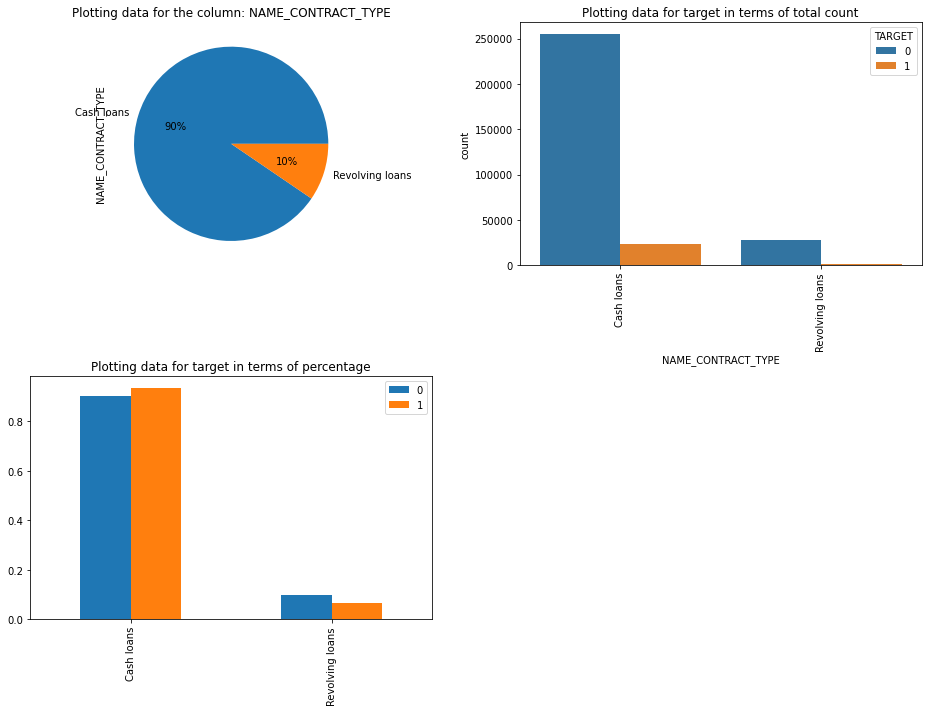

Pltting  CODE_GENDER


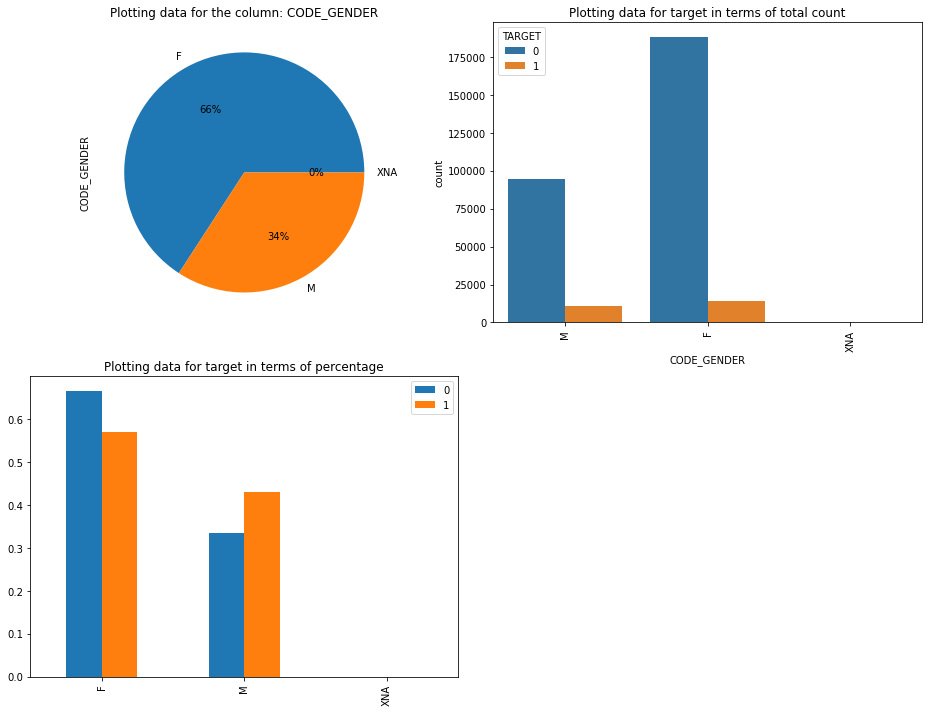

Pltting  FLAG_OWN_CAR


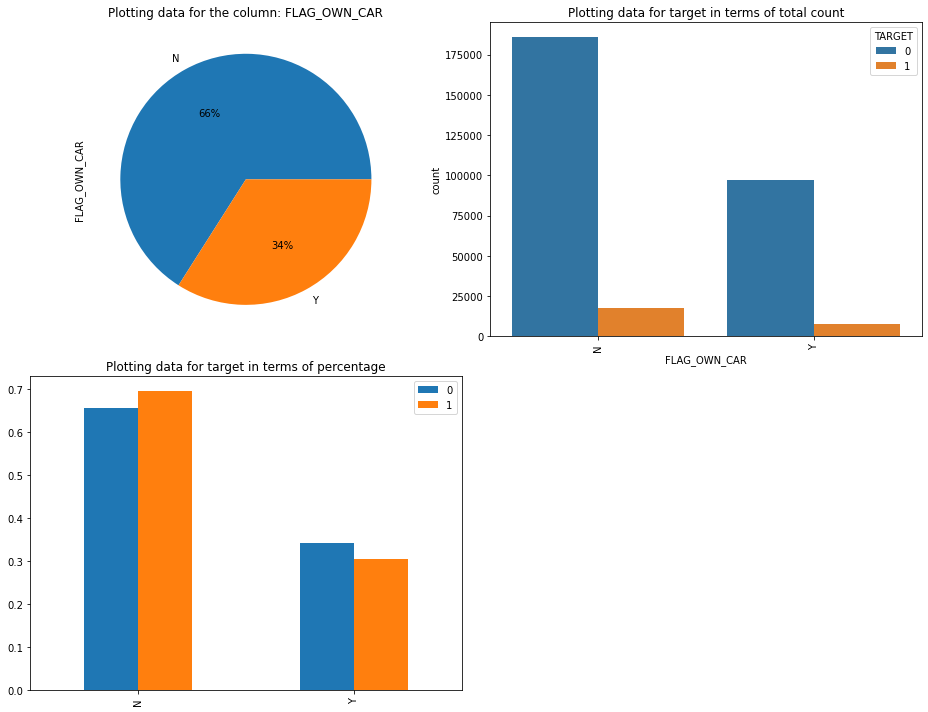

Pltting  FLAG_OWN_REALTY


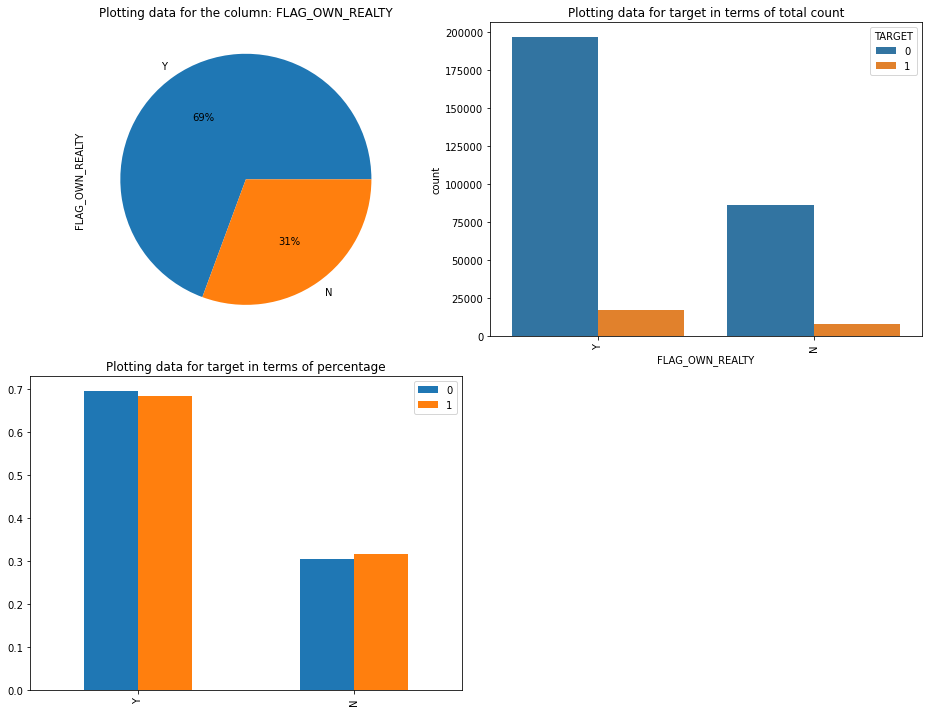

Pltting  NAME_TYPE_SUITE


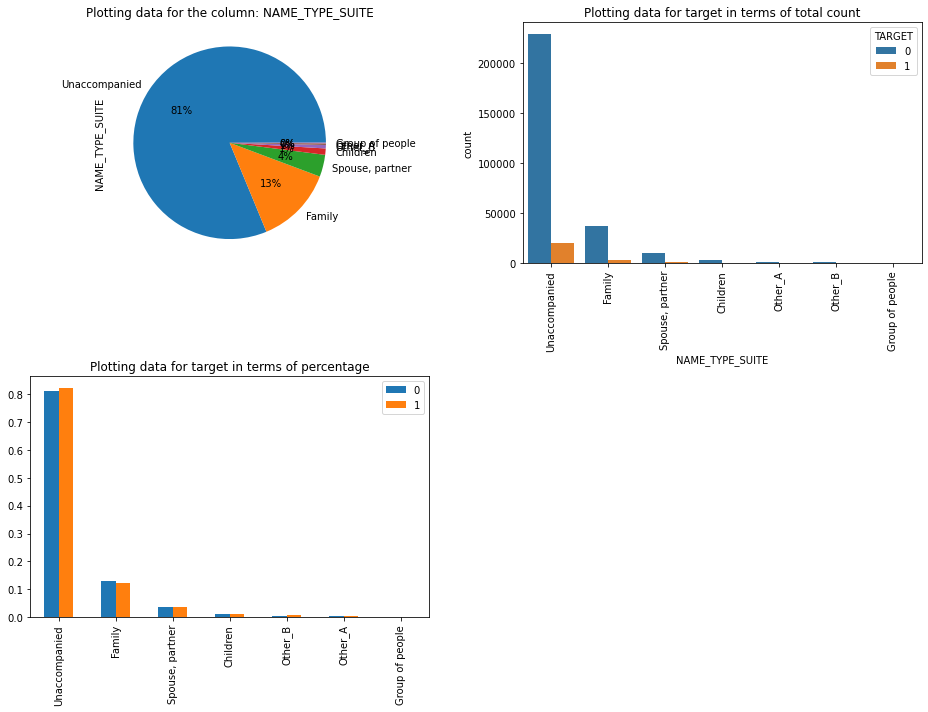

Pltting  NAME_INCOME_TYPE


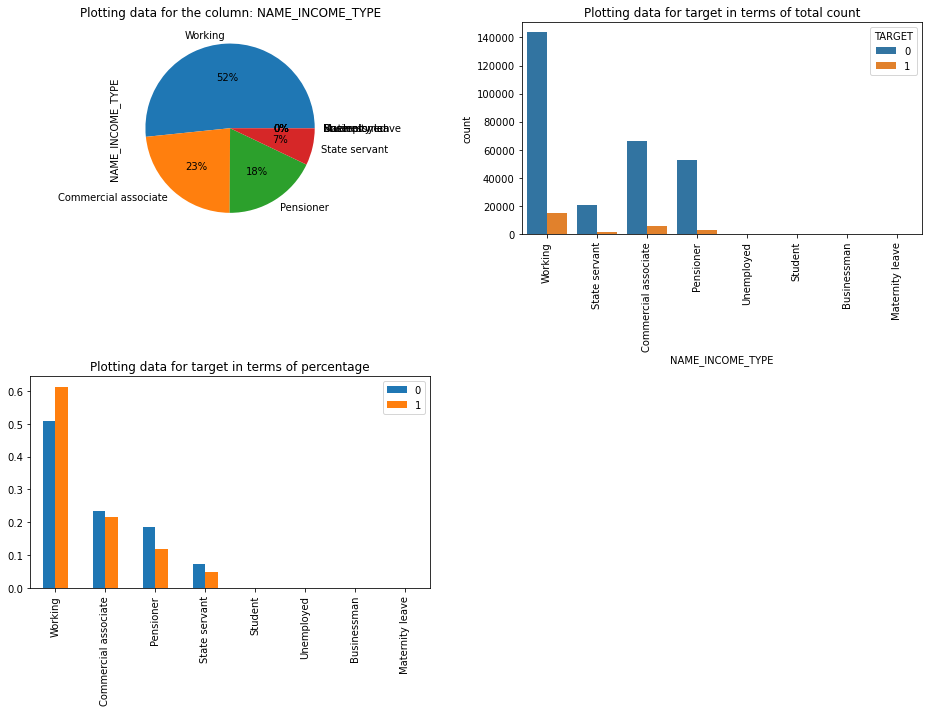

Pltting  NAME_EDUCATION_TYPE


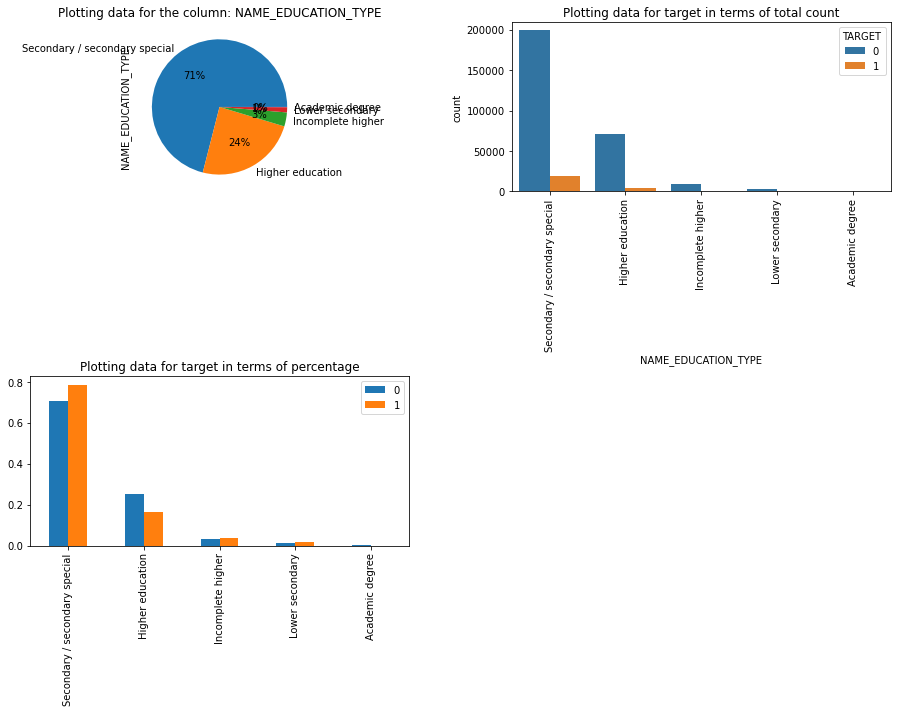

Pltting  NAME_FAMILY_STATUS


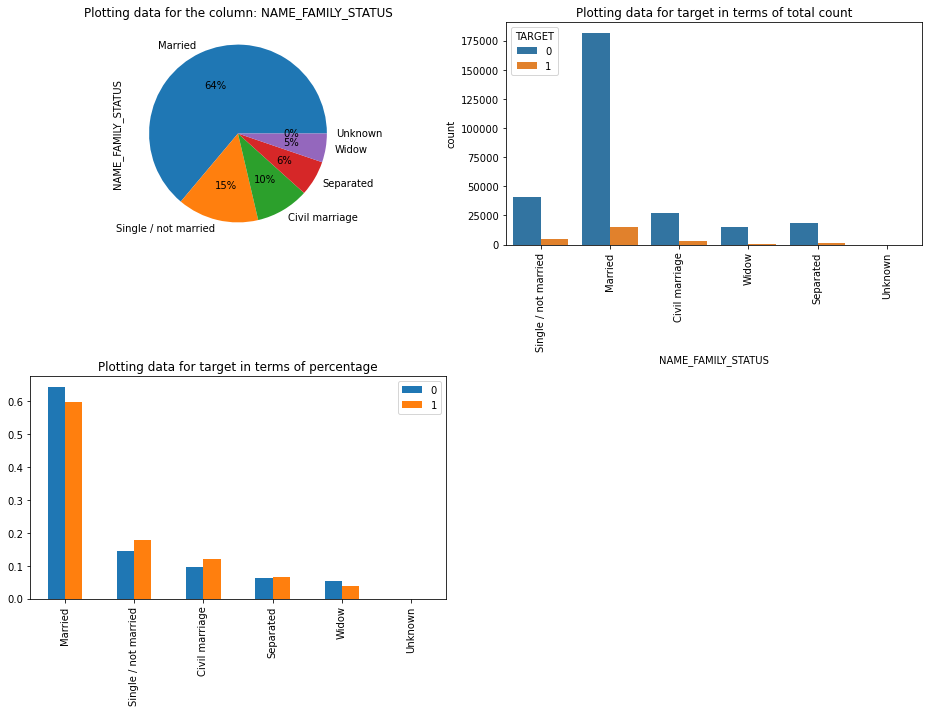

Pltting  NAME_HOUSING_TYPE


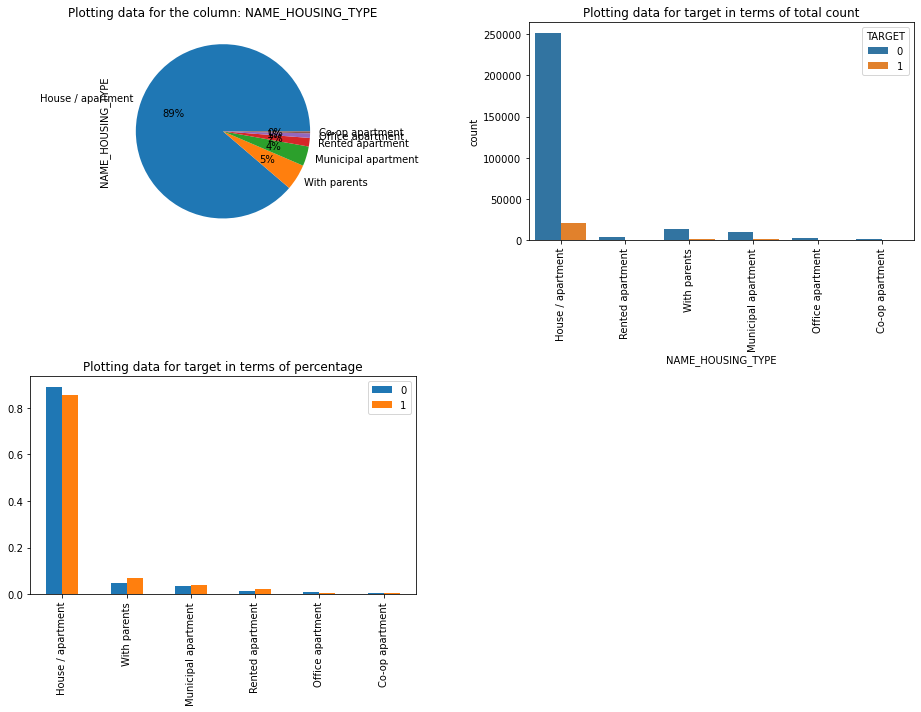

Pltting  OCCUPATION_TYPE


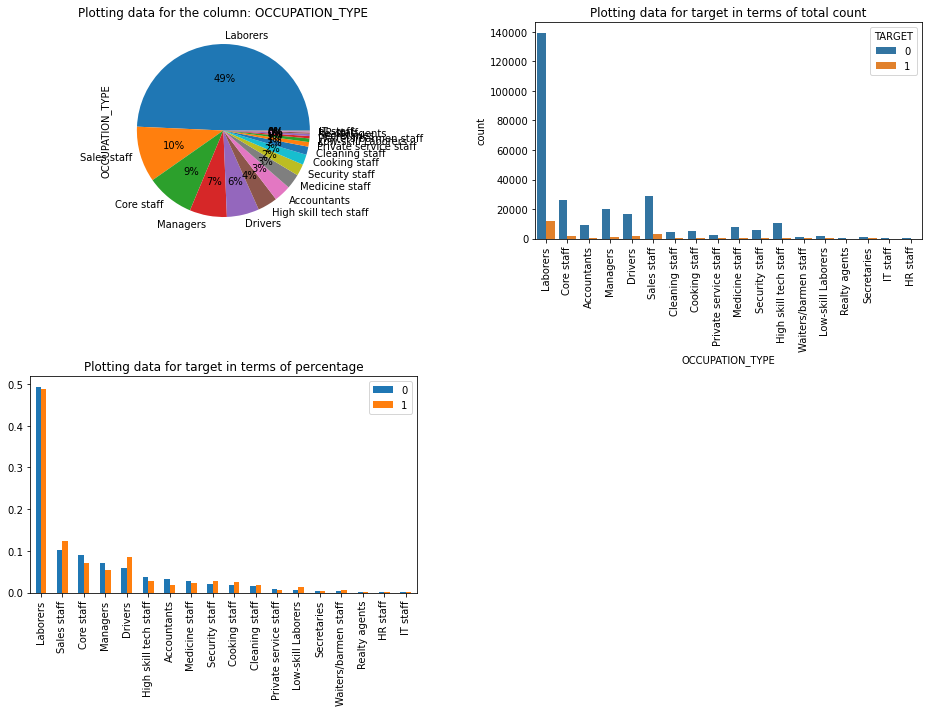

Pltting  WEEKDAY_APPR_PROCESS_START


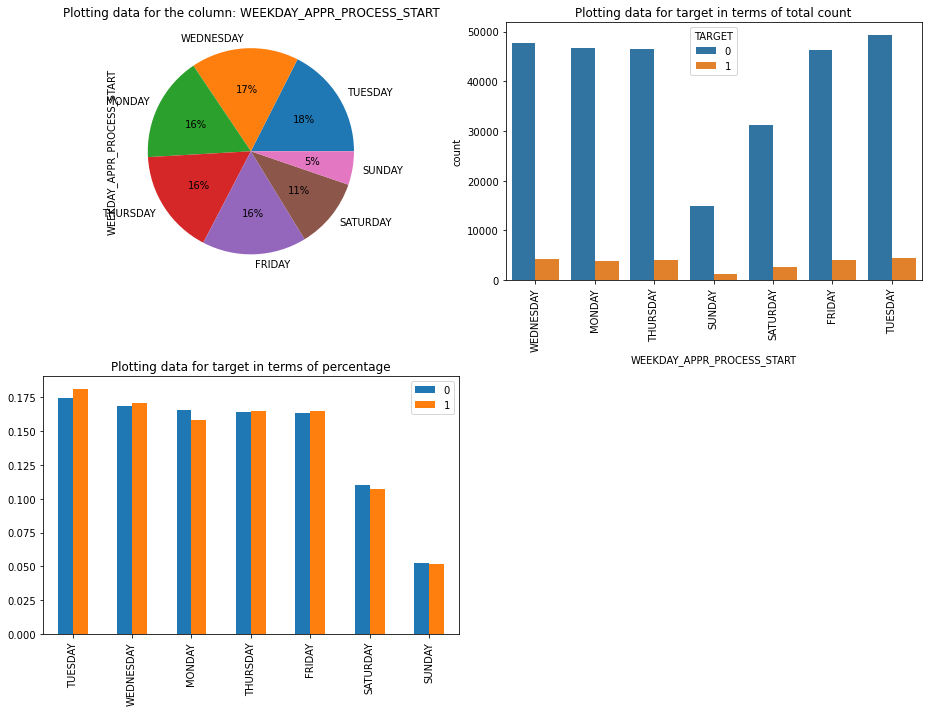

Pltting  ORGANIZATION_TYPE


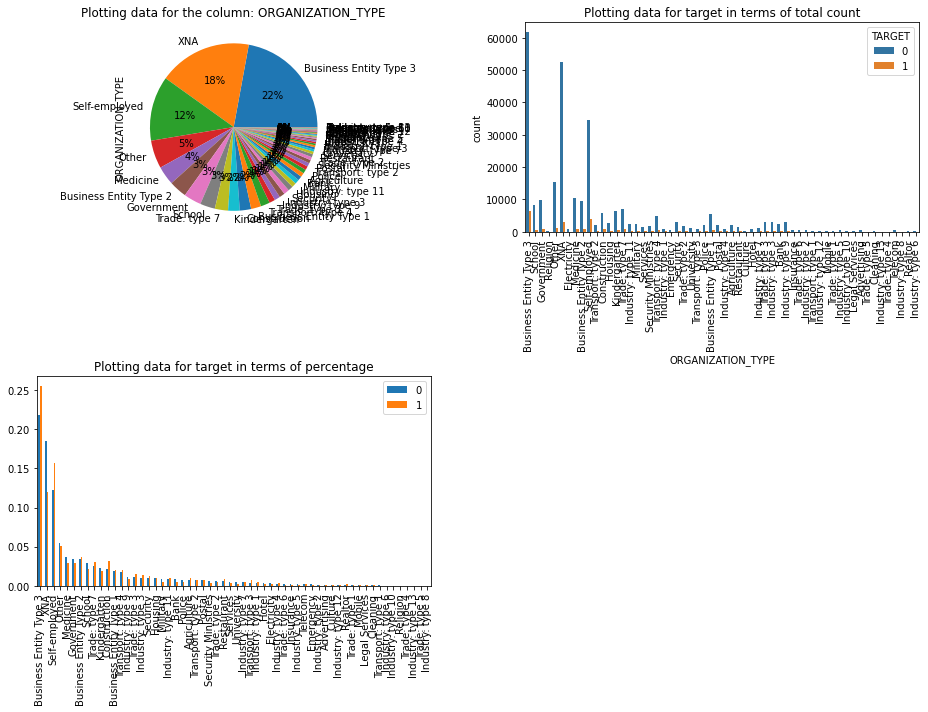

Pltting  EMERGENCYSTATE_MODE


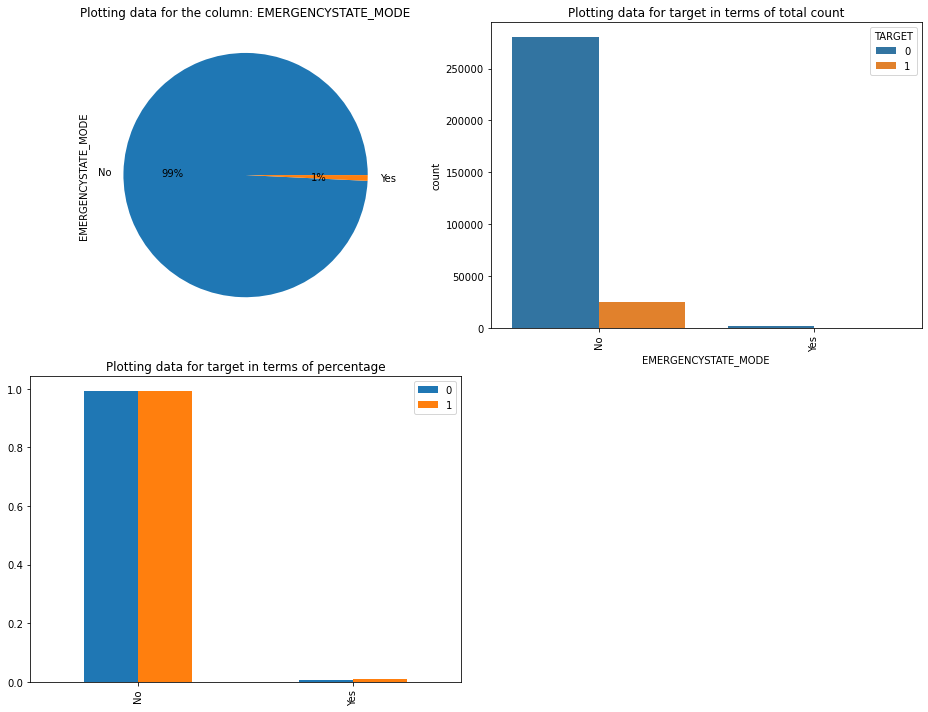

In [174]:
for column in train_categorical:
    print("Pltting ",column)
    plotting(App, train_0, train_1, column)
    print("=======================================================")

#### Insights from the above analysis:
1. Cash loans seeked more over revolving loans. This disparity affects the defaulting/repaying rates as well, cash loans seekers default more.
2. Female clients are more than male clients when it comes to seeking loans. Yet, male applicants defualt more.
3. Car owners seek loans less than non-car owners. This might be because they obviously have no requirement for a car loan. Also, they default less.
4. opposite to the car owner data, realty owners seek more loans than non-realty owners. Non-realty owners default more though.
5. Unaccompanied loan applicants category has the most applications and also show a higher rate of defaulting.
6. Working class loan seekers are more over other categories. they also show a significantly high rate of defaulting.
7. Secondary/secondary special education level clients seek the most loans when it comes to education type, they also default more.
8. Married applicants seek the most loans, followed by single applicants.
9. Renting applicants are less prevalent, while those that own a house/appartment clients seek loans more.
10. Laborer class clients seek loans more.

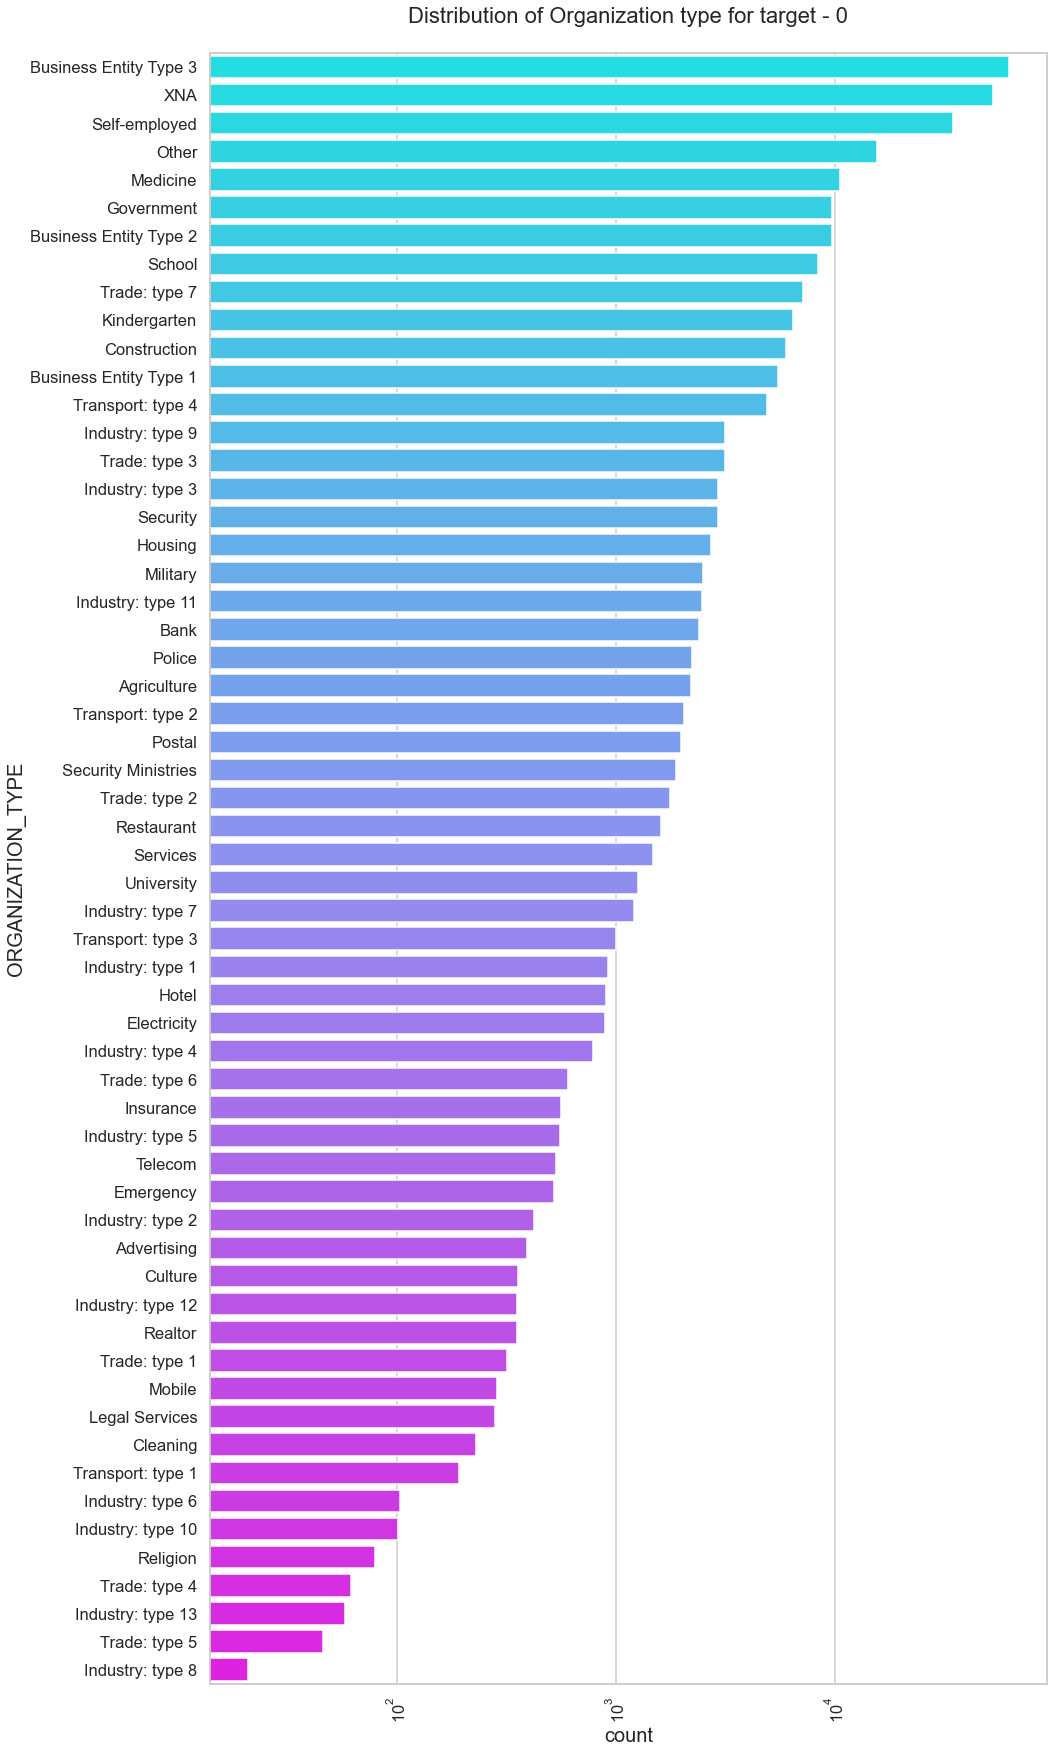

In [175]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=train_0,y='ORGANIZATION_TYPE',order=train_0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

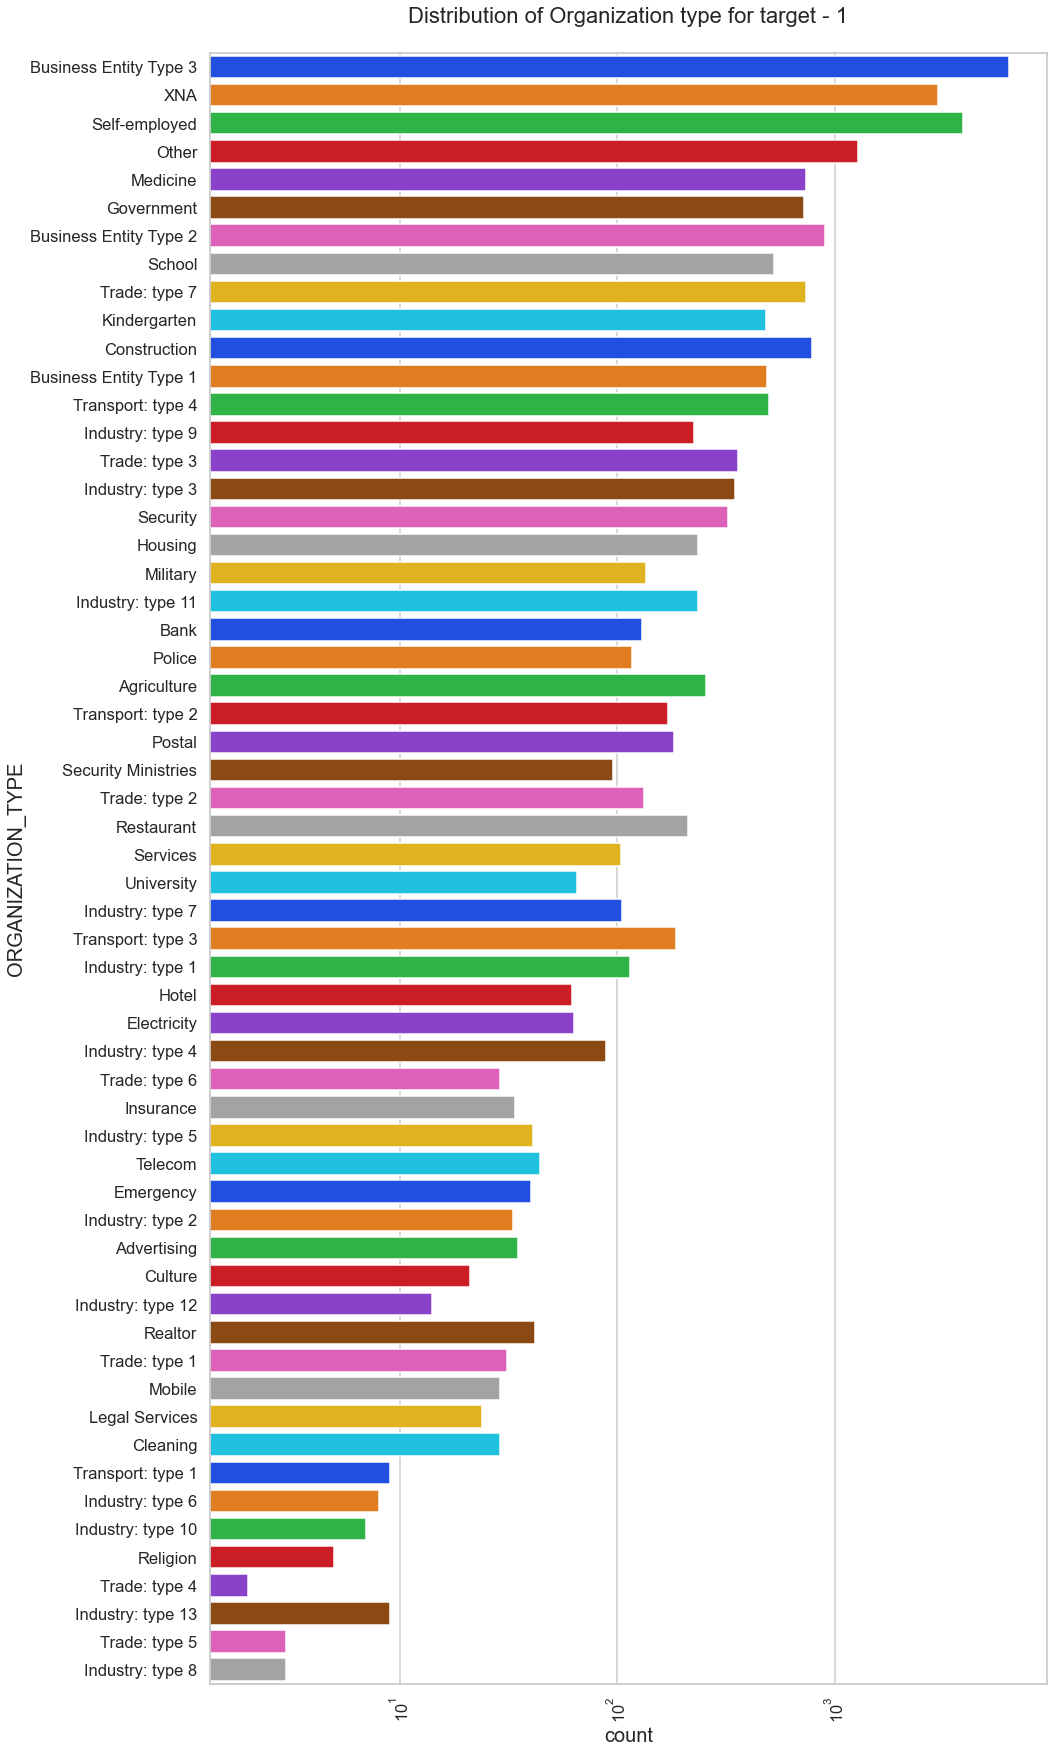

In [194]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=train_1,y='ORGANIZATION_TYPE',order=train_0['ORGANIZATION_TYPE'].value_counts().index,palette='bright')

plt.show()

#### Does organization type influence the rate of defaulting on a loan?
- Yes. As can be seen above Buisness entity type 3 class of organization background having clients default less. Could be because they have a continous cash flow.
- Organization type does have an impact on the amount of loan borrowers that end up repaying their loans
- Business entity type 3 category of organization type proves to have the greatest number of loan repayors 
- The lowest can be seen in the industry type 8 category
- There is a slight shift in loan defaulters when compared to non-defaulters shown in the previous graph
- Whereas the spread of loan repayors was distributed in a decreasing gradient in the previous figure, the same can’t be said for the data over here.
- Some examples could be the categories like University, Industry type 1, Hotel, electricity, transport type 3, Industry type 12, trade type 4, and so on
- This could potentially show that though loan repayment rates can be tied to the organization type, defaulting rate doesn’t play by the same rules.


#### Using Target 0/1 variables For Bivariate analyses

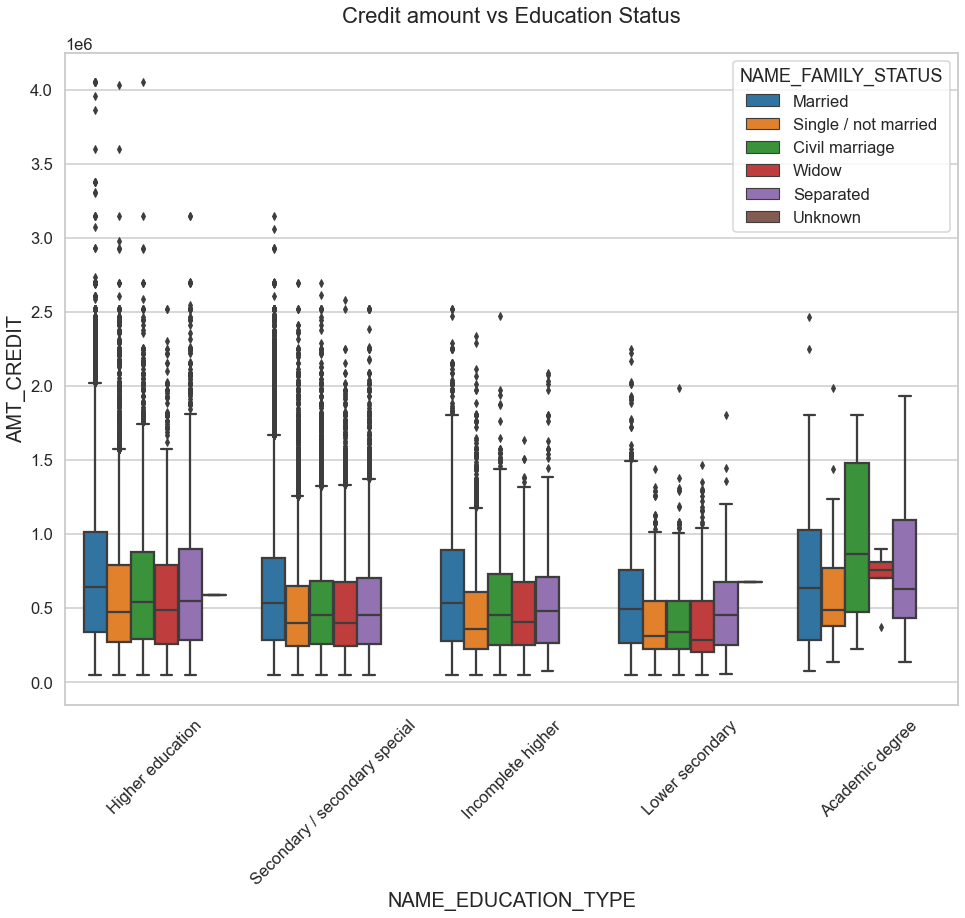

In [177]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =train_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### Insights from the figure above:
All of these insights are being postulated keeping loan payers/non-defaulters in mind only.
1. when it comes to anomalies/outliers in given credit amount, people with higher education come out to be the topmost.
2. People in civil marriage who also hold an academic degreeare often given much more credit amount
3. Overall, people under married category are offered more credit than all the other categories (except Academic degree holders)
4. Widowed borrowers are offered less credit usually.
5. single/unmarried clients are given an almost consistent range/distribution of credit amount, which is slightly higher when the borrower has an academic degree or higher education.
6. When looked at the overall distribution of all family statuses in different education categories, people with only lower secondary degree are offered low credit amounts. The highest distribution can be seen in borrowers with an academic degree.

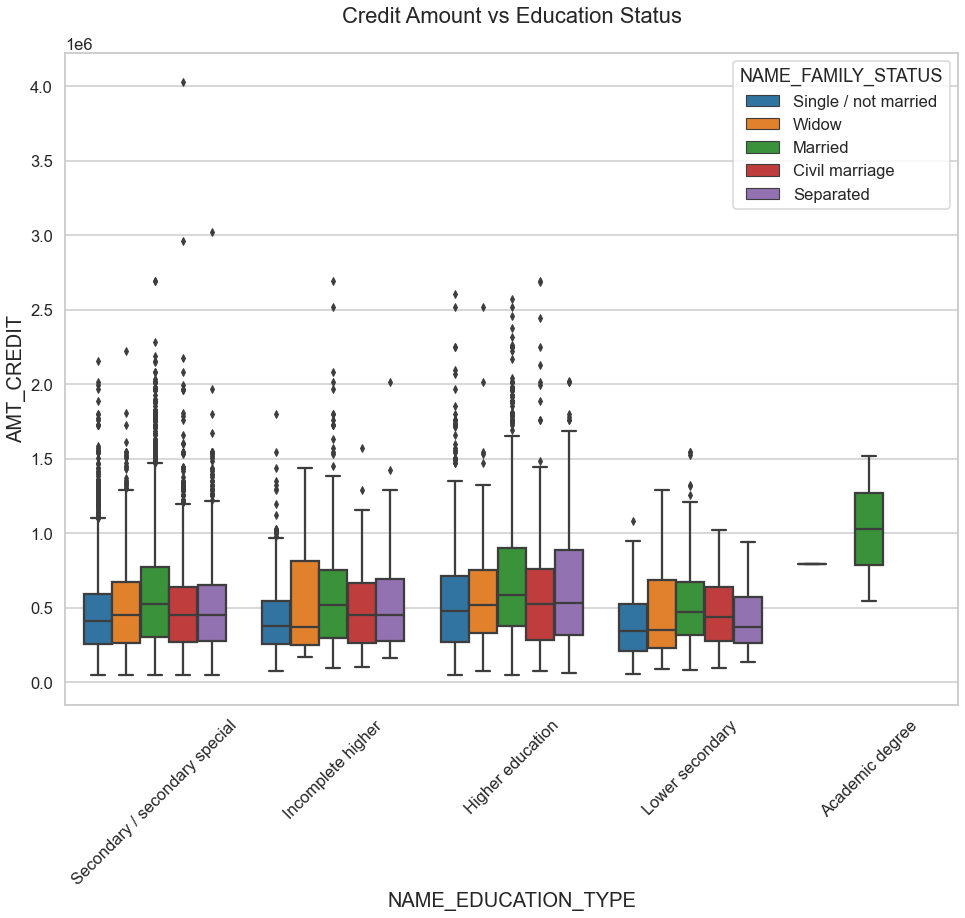

In [178]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =train_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

#### Insights from the figure above:
These insights are formed after keeping defaulters in mind:
1. Since the more credits are offered to academic degree holder, it makes sense that the data will show more amount of defaulters in the same category.
2. Single/unmarried category has the lowest number of defaulters, credit offered to them is also low.
3. Married, widowed borrowers are offered more credit in all categories except the academic degree holders. In higher education category separated individuals are offered more credit, and they also default more.

In [179]:
target0_corr=train_0.iloc[0:,2:]
target1_corr=train_1.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

CORRELATION FOR TARGET = 0

In [180]:
# Correlation representation using heat map
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
    sns.heatmap(data, cmap="PuBuGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

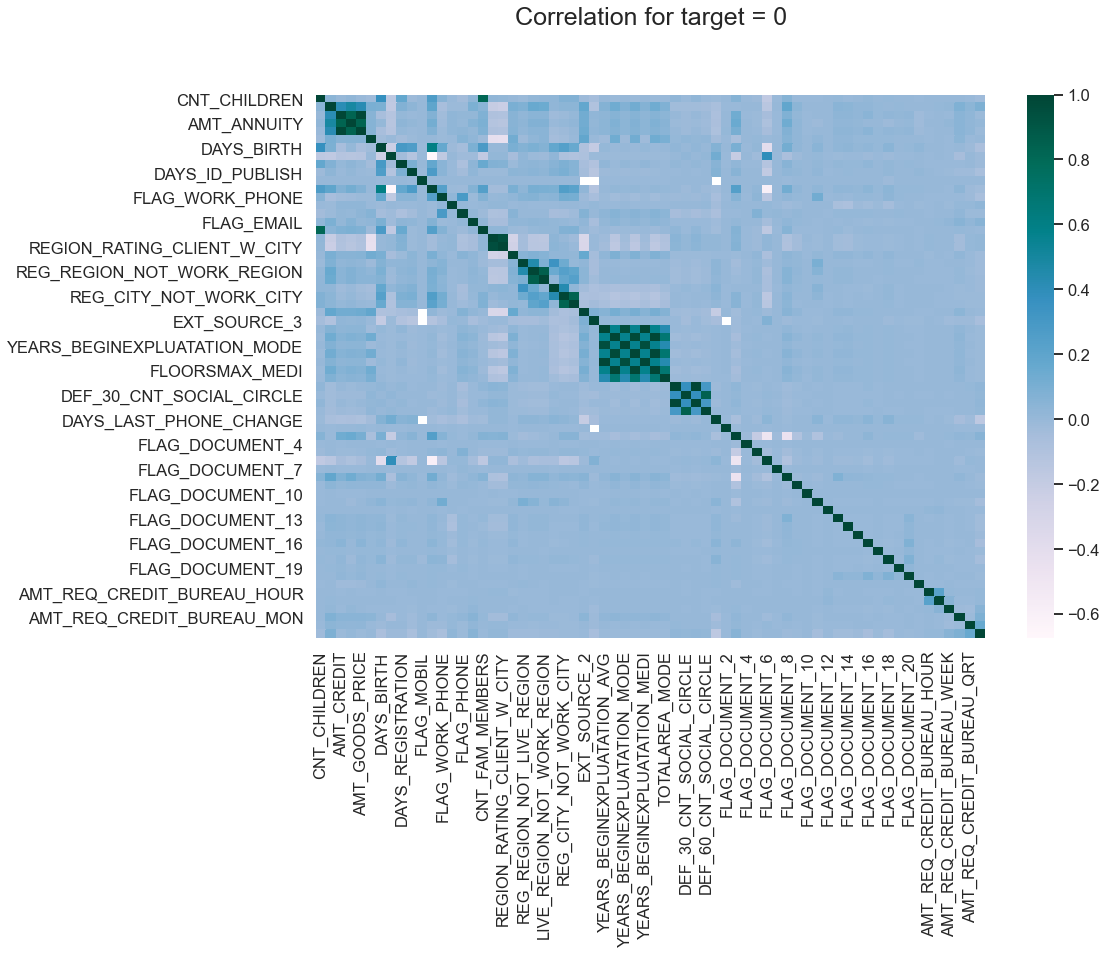

In [181]:
targets_corr(data=target0,title='Correlation for target = 0')

CORRELATION FOR TARGET = 1

In [182]:
def targets1_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

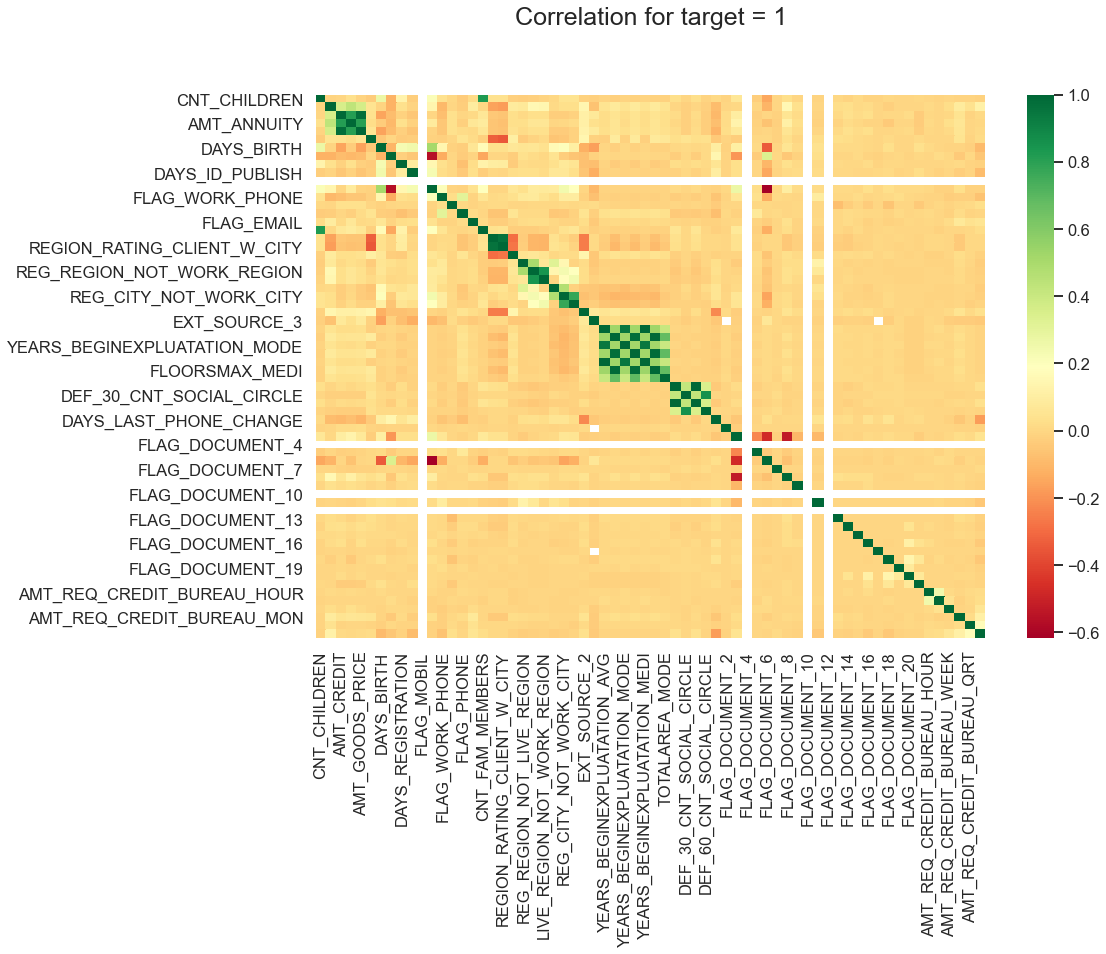

In [183]:
targets1_corr(data=target1,title='Correlation for target = 1')

### Merging the previous application dataset with the current application dataset

In [184]:
NApp=pd.merge(left=App,right=PrvApp,how='inner',on='SK_ID_CURR',suffixes='_x')

In [185]:
NApp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [186]:
# Changing the name of columns in the new merged dataset
NApp1= NApp.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE_':'NAME_TYPE_SUITE',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [187]:
# Dropping columns that wouldn't give any significant insights into the available data
NApp1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [188]:
NApp1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [189]:
NApp1.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,...,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,-1.632105e+04,6.870203e+04,-5.003233e+03,...,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.452777e+05,3.551051e+03,...,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-2.520100e+04,-1.791200e+04,-2.467200e+04,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,-1.998000e+04,-2.828000e+03,-7.510000e+03,...,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,-1.604400e+04,-1.281000e+03,-4.508000e+03,...,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,-1.273900e+04,-2.840000e+02,-2.001000e+03,...,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,-7.489000e+03,3.652430e+05,0.000000e+00,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [190]:
NApp1.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 104 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   TARGET                        int64  
 1   NAME_CONTRACT_TYPE            object 
 2   CODE_GENDER                   object 
 3   FLAG_OWN_CAR                  object 
 4   FLAG_OWN_REALTY               object 
 5   CNT_CHILDREN                  int64  
 6   AMT_INCOME_TOTAL              float64
 7   AMT_CREDIT                    float64
 8   AMT_ANNUITY                   float64
 9   AMT_GOODS_PRICE_              float64
 10  NAME_TYPE_SUITE               object 
 11  NAME_INCOME_TYPE              object 
 12  NAME_EDUCATION_TYPE           object 
 13  NAME_FAMILY_STATUS            object 
 14  NAME_HOUSING_TYPE             object 
 15  REGION_POPULATION_RELATIVE    float64
 16  DAYS_BIRTH                    int64  
 17  DAYS_EMPLOYED                 int64  
 18  DAYS_REGISTRATION    

Based on the data above, let's get into analysis

In [191]:
Ntrain_0 = NApp1.loc[NApp1['TARGET'] == 0]
Ntrain_1 = NApp1.loc[NApp1['TARGET'] == 1]

In [192]:
def plotting(train, Ntrain0, Ntrain1, column):
    
    train = train
    Ntrain_0 = Ntrain0
    Ntrain_1 = Ntrain1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    NApp1 = pd.DataFrame()
    NApp1['0']= ((Ntrain_0[col].value_counts())/len(Ntrain_0))
    NApp1['1']= ((Ntrain_1[col].value_counts())/len(Ntrain_1))
    NApp1.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout()

    plt.show()

Pltting  NAME_CONTRACT_TYPE


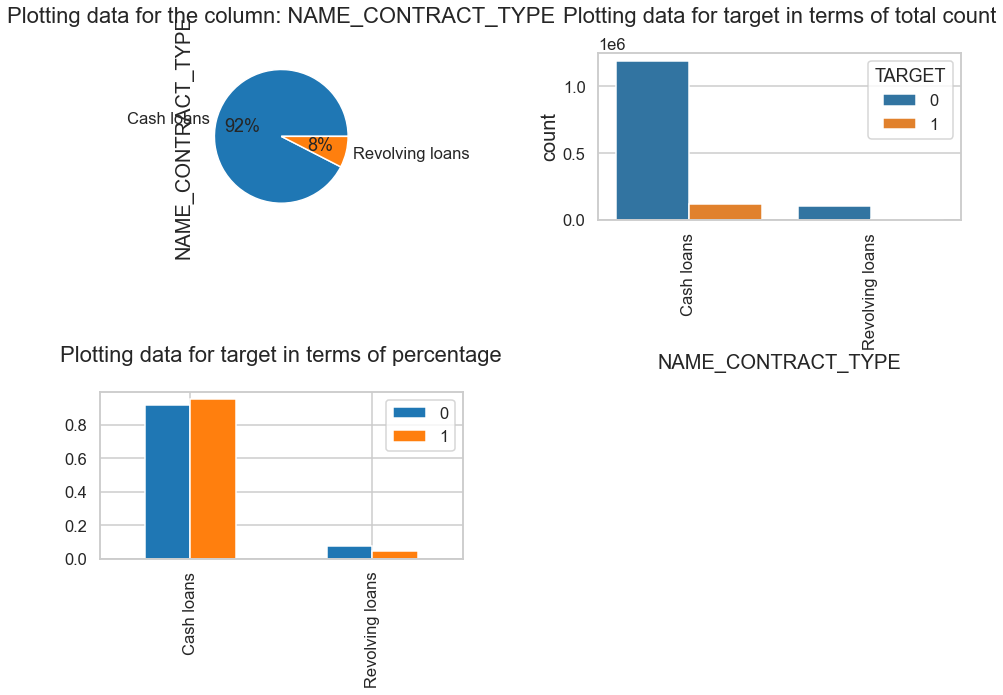

Pltting  CODE_GENDER


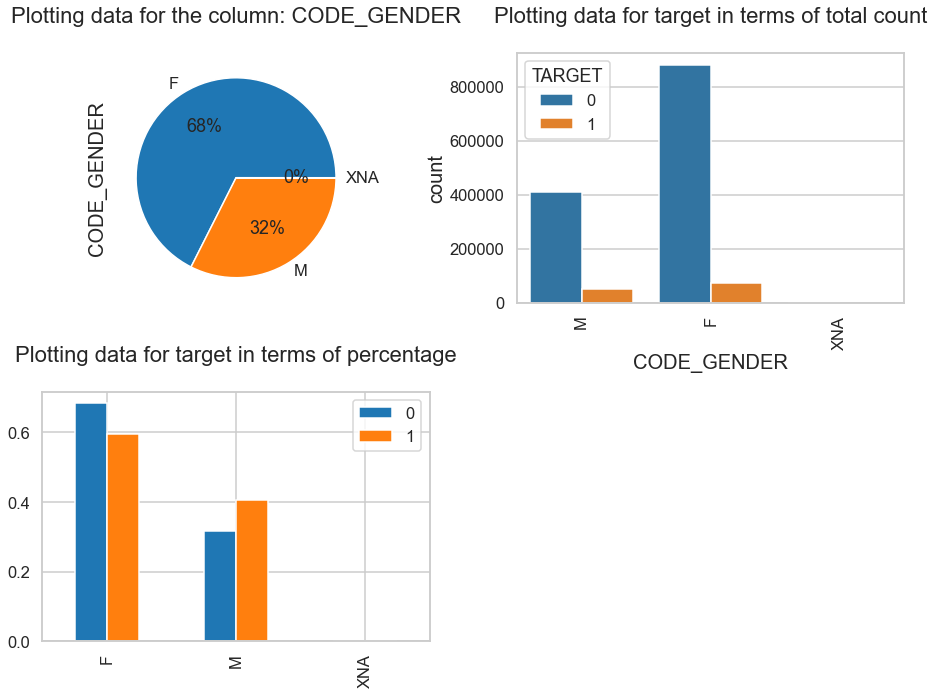

Pltting  FLAG_OWN_CAR


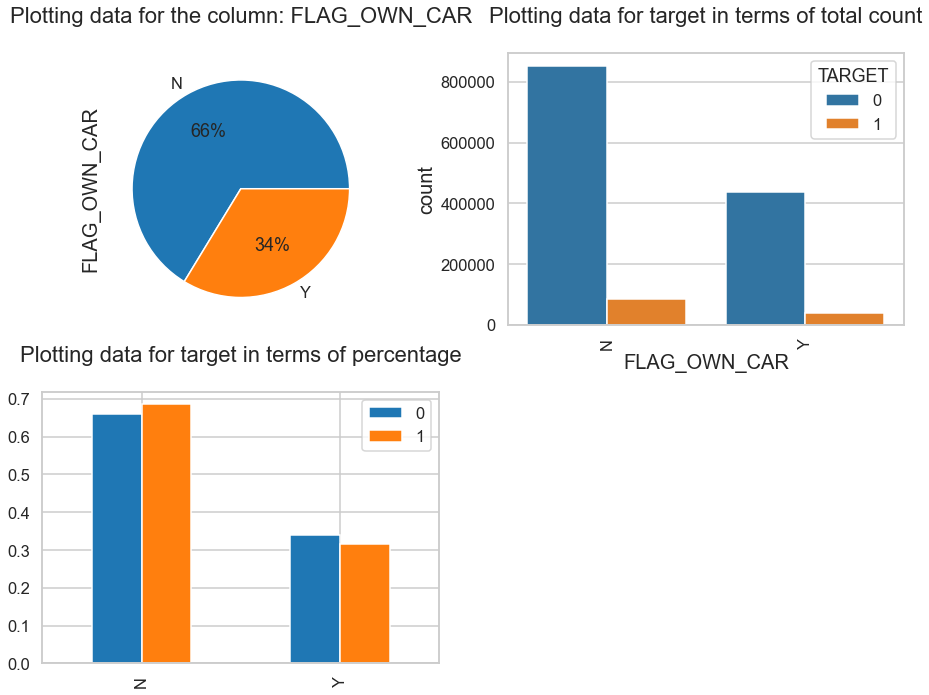

Pltting  FLAG_OWN_REALTY


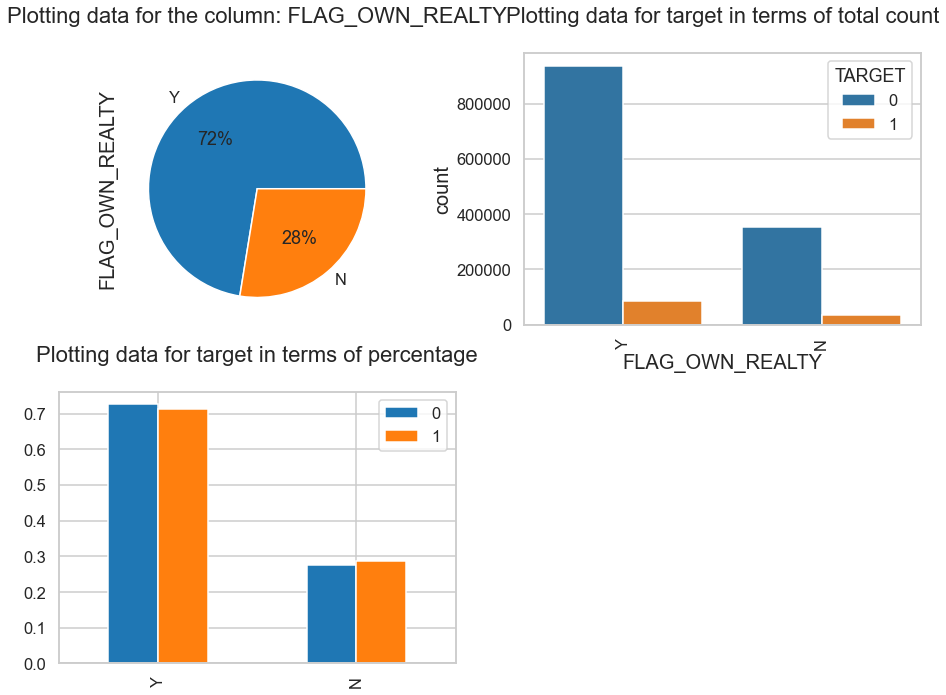

Pltting  NAME_TYPE_SUITE


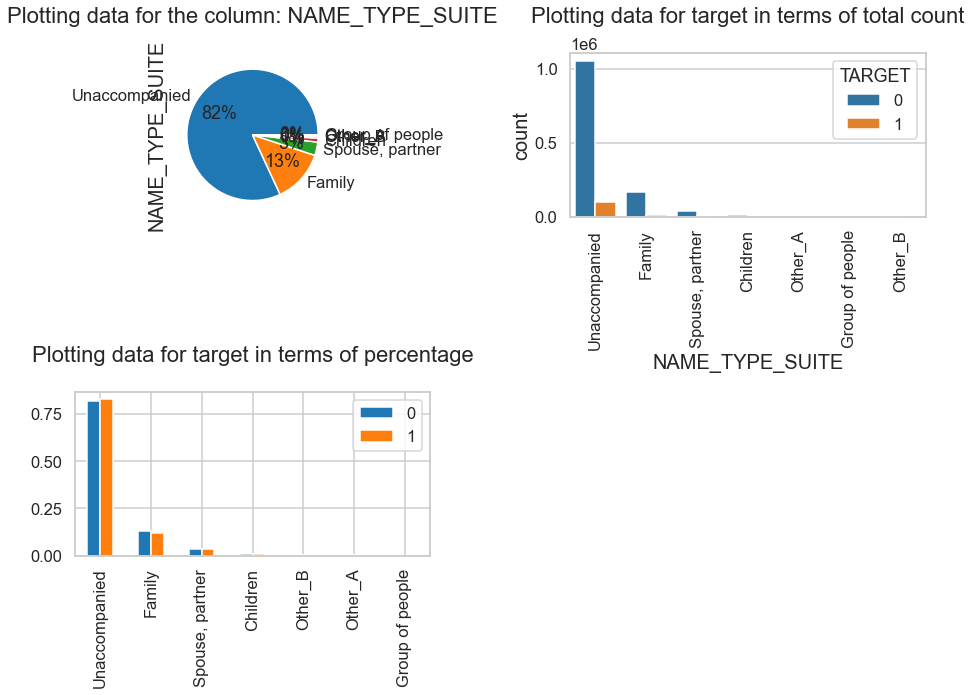

Pltting  NAME_INCOME_TYPE


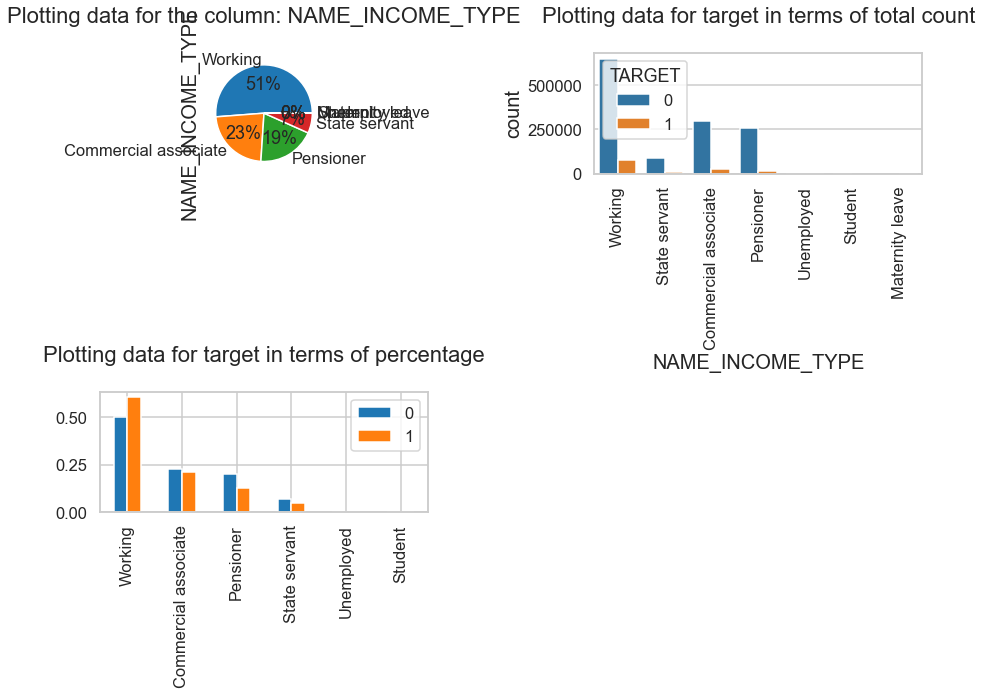

Pltting  NAME_EDUCATION_TYPE


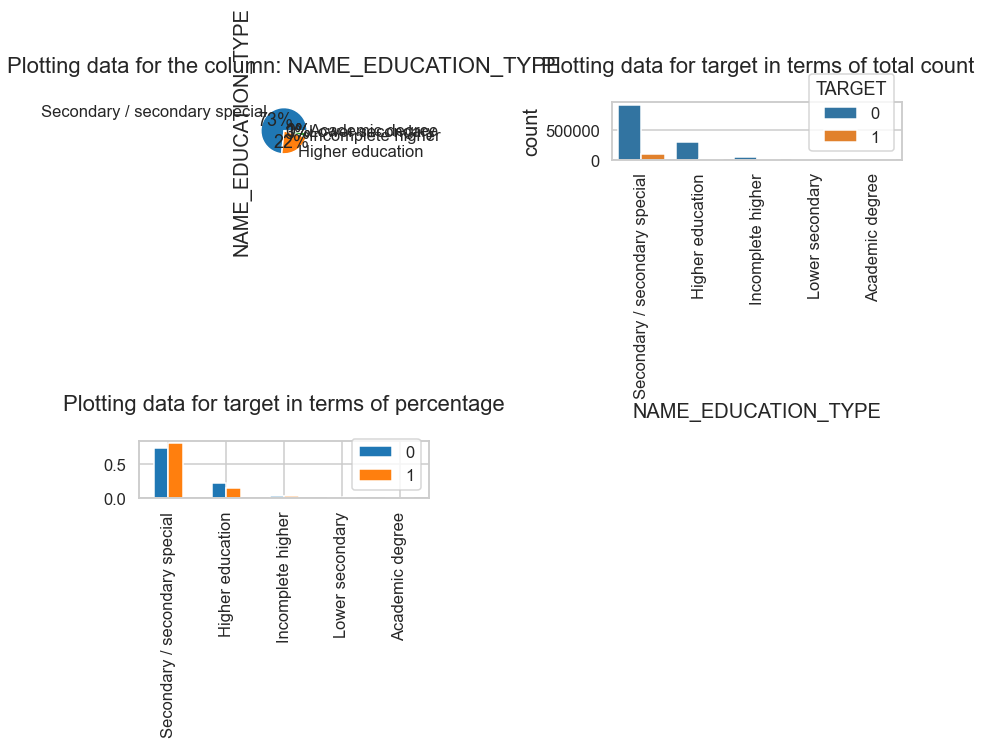

Pltting  NAME_FAMILY_STATUS


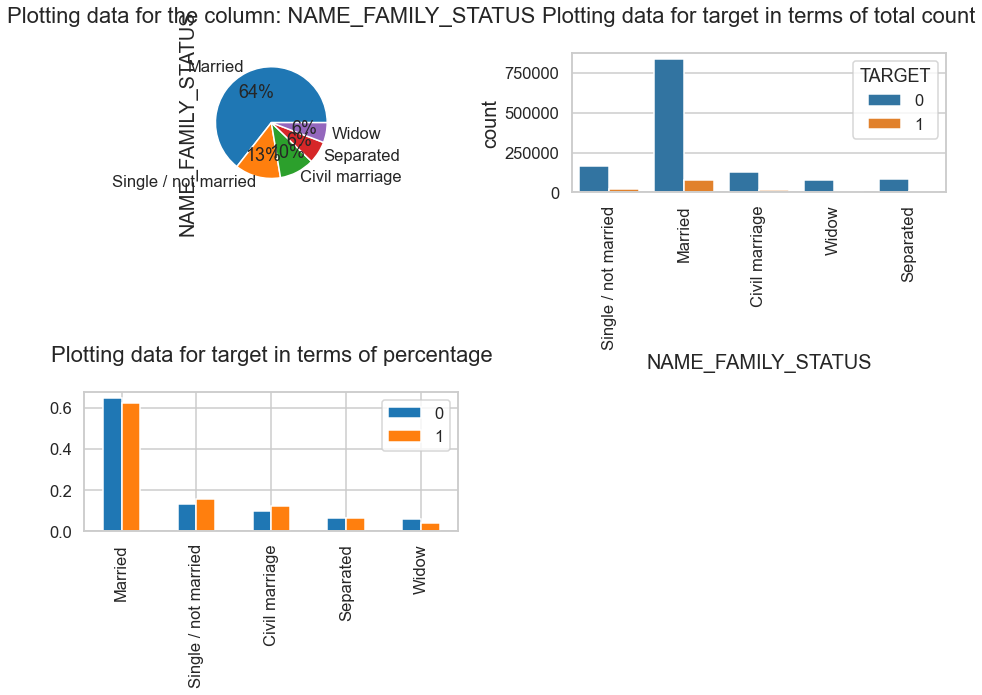

Pltting  NAME_HOUSING_TYPE


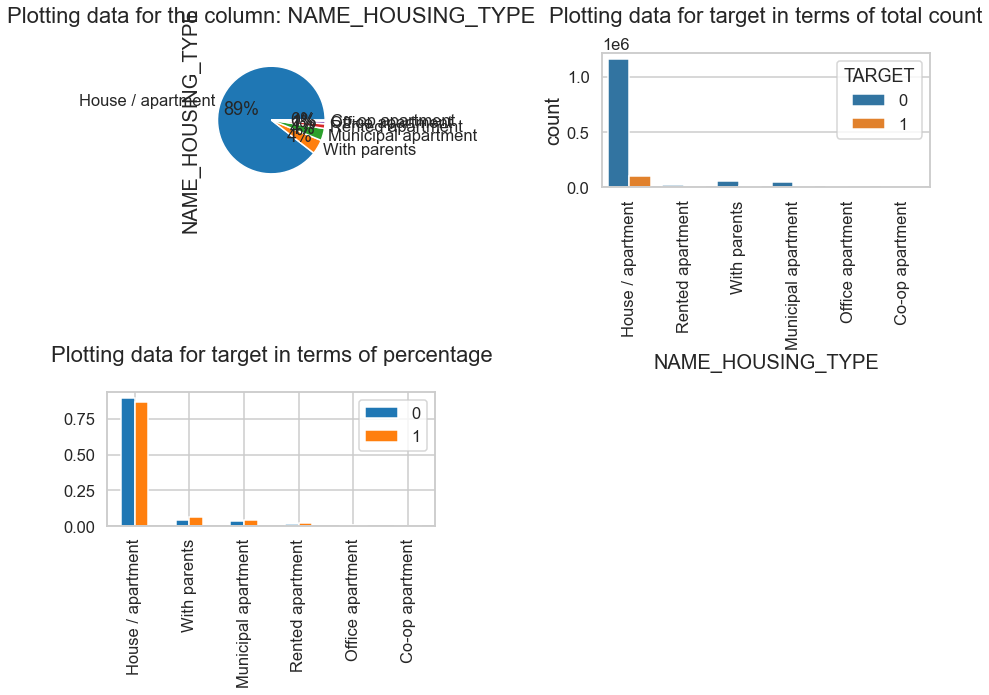

Pltting  OCCUPATION_TYPE


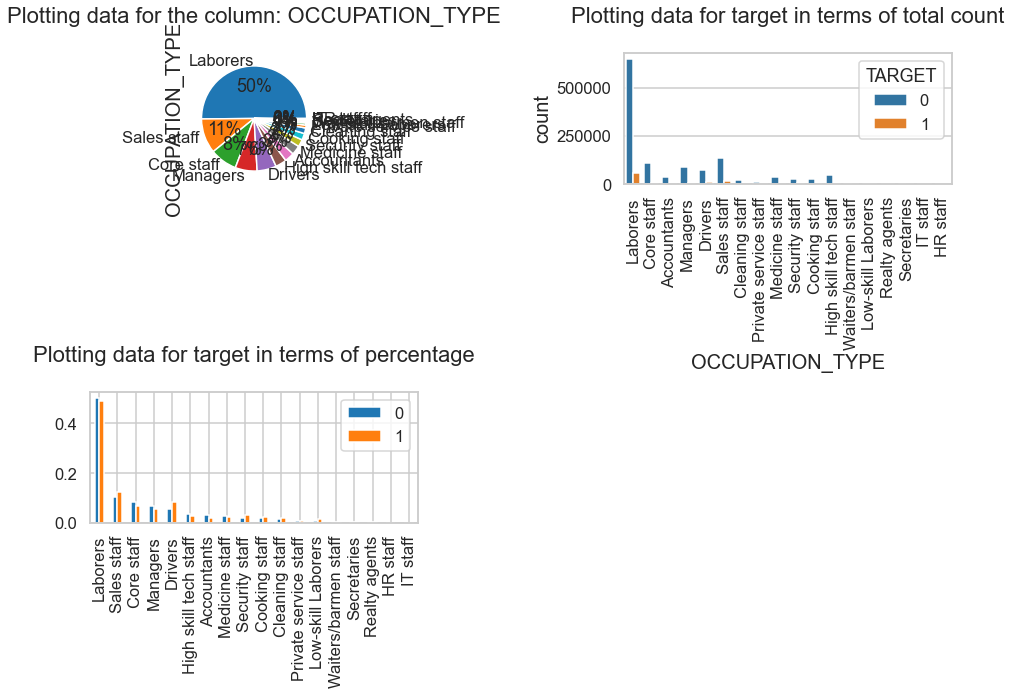

Pltting  WEEKDAY_APPR_PROCESS_START


KeyError: 'WEEKDAY_APPR_PROCESS_START'

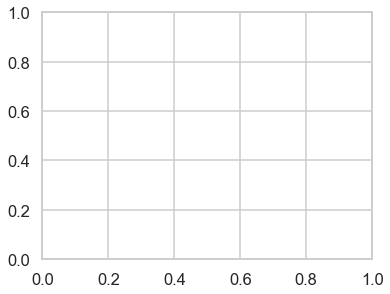

In [199]:
for column in train_categorical:
    print("Pltting ",column)
    plotting(NApp1, Ntrain_0, Ntrain_1, column)
    print("=======================================================")

#### Insights from the above analysis:
This data is similar to and corresponds with the univariate analysis data from before.


### Univariate analyses on combined datasets
Taking a look at Contract status against purpose

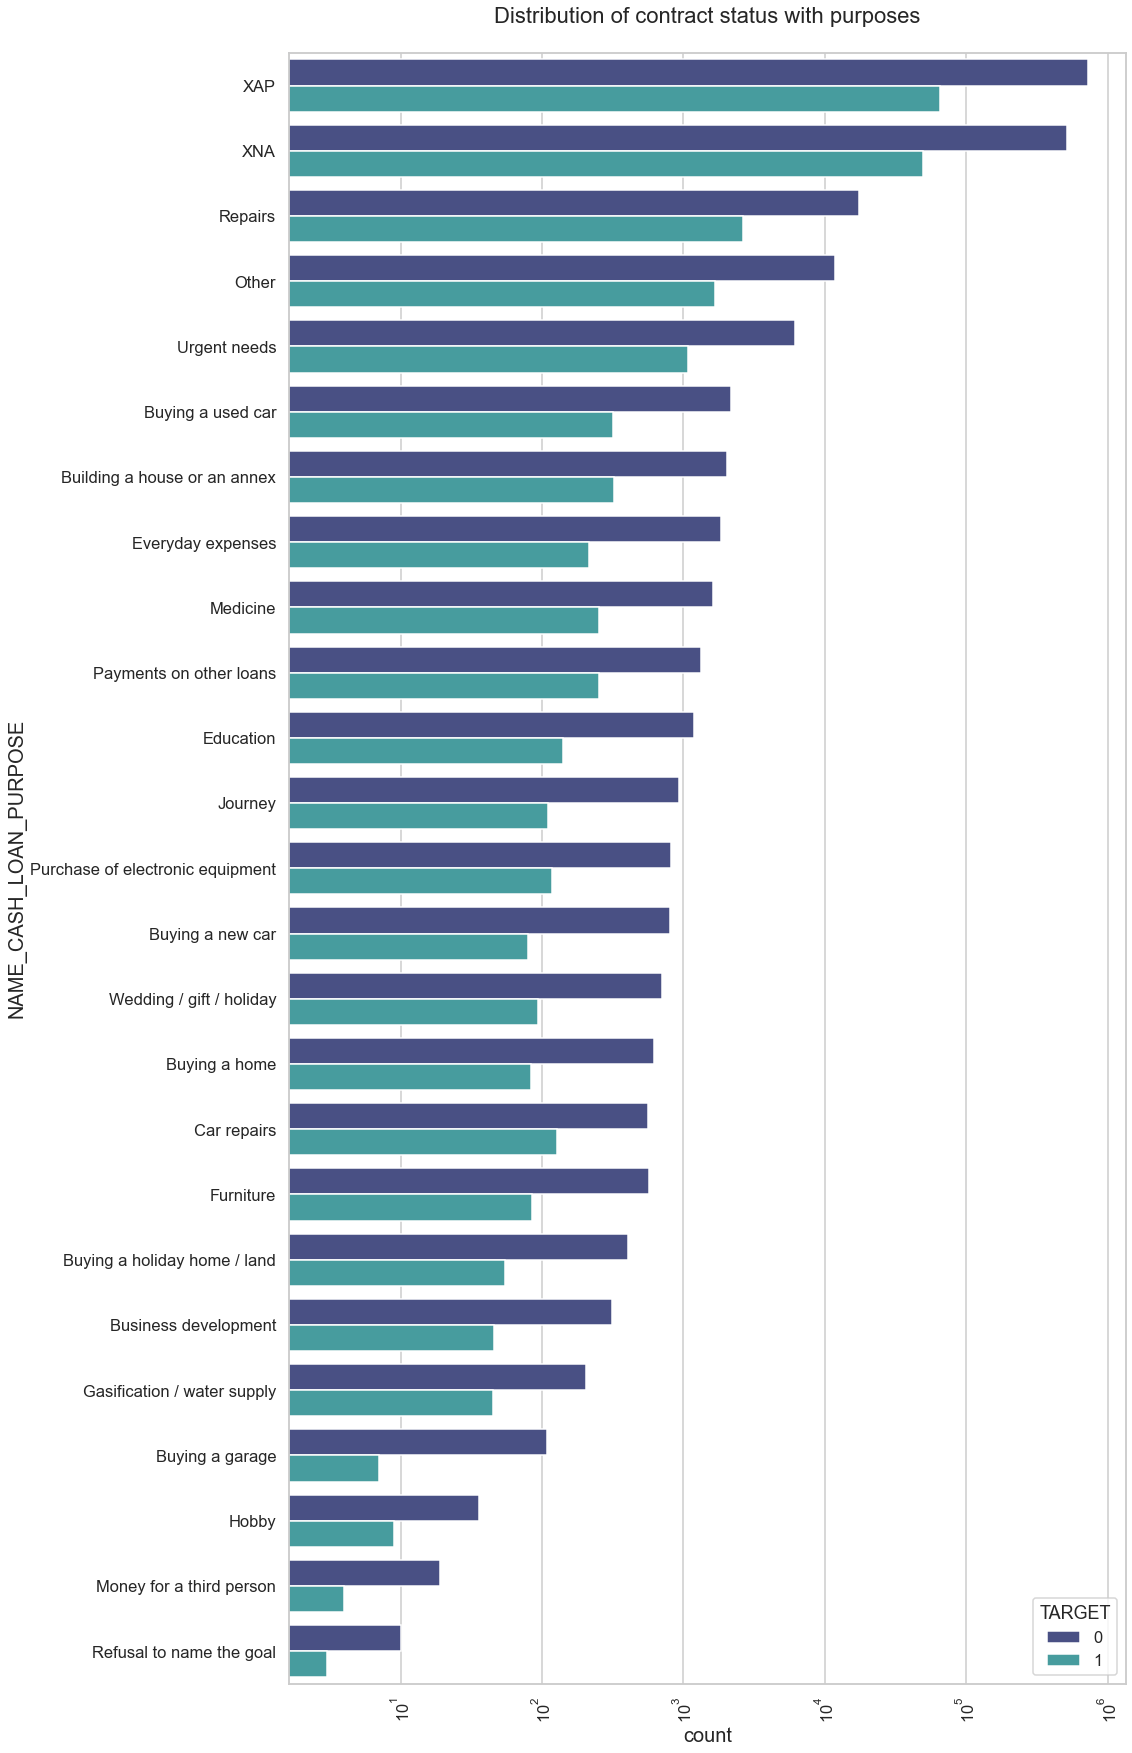

In [195]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = NApp1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=NApp1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='mako') 

#### Insights from the above graph
1. when we look at the purpose of borrowing loans and their impact on the defaulting/non-defaulting rates, we can see that most loan takers that get don't default, seek loan for repair and maintenance of their property. 
2. The applicants that refuse to specify any sort of end goal, this also being the least loan seeking category, get the least amount of defaulters.
3. Curiously, when it comes to specific categories, ration of people that default more on loans in comparison to non-defaulters in the same category, can be seen in categories such as 'car repairs' and 'payments on other loans'.

NOTE: XAP, XNA signify that either the purpose was not shared or the bank is not sure of the purpose. Basically, we are not sure about this category as these values are just placeholders.

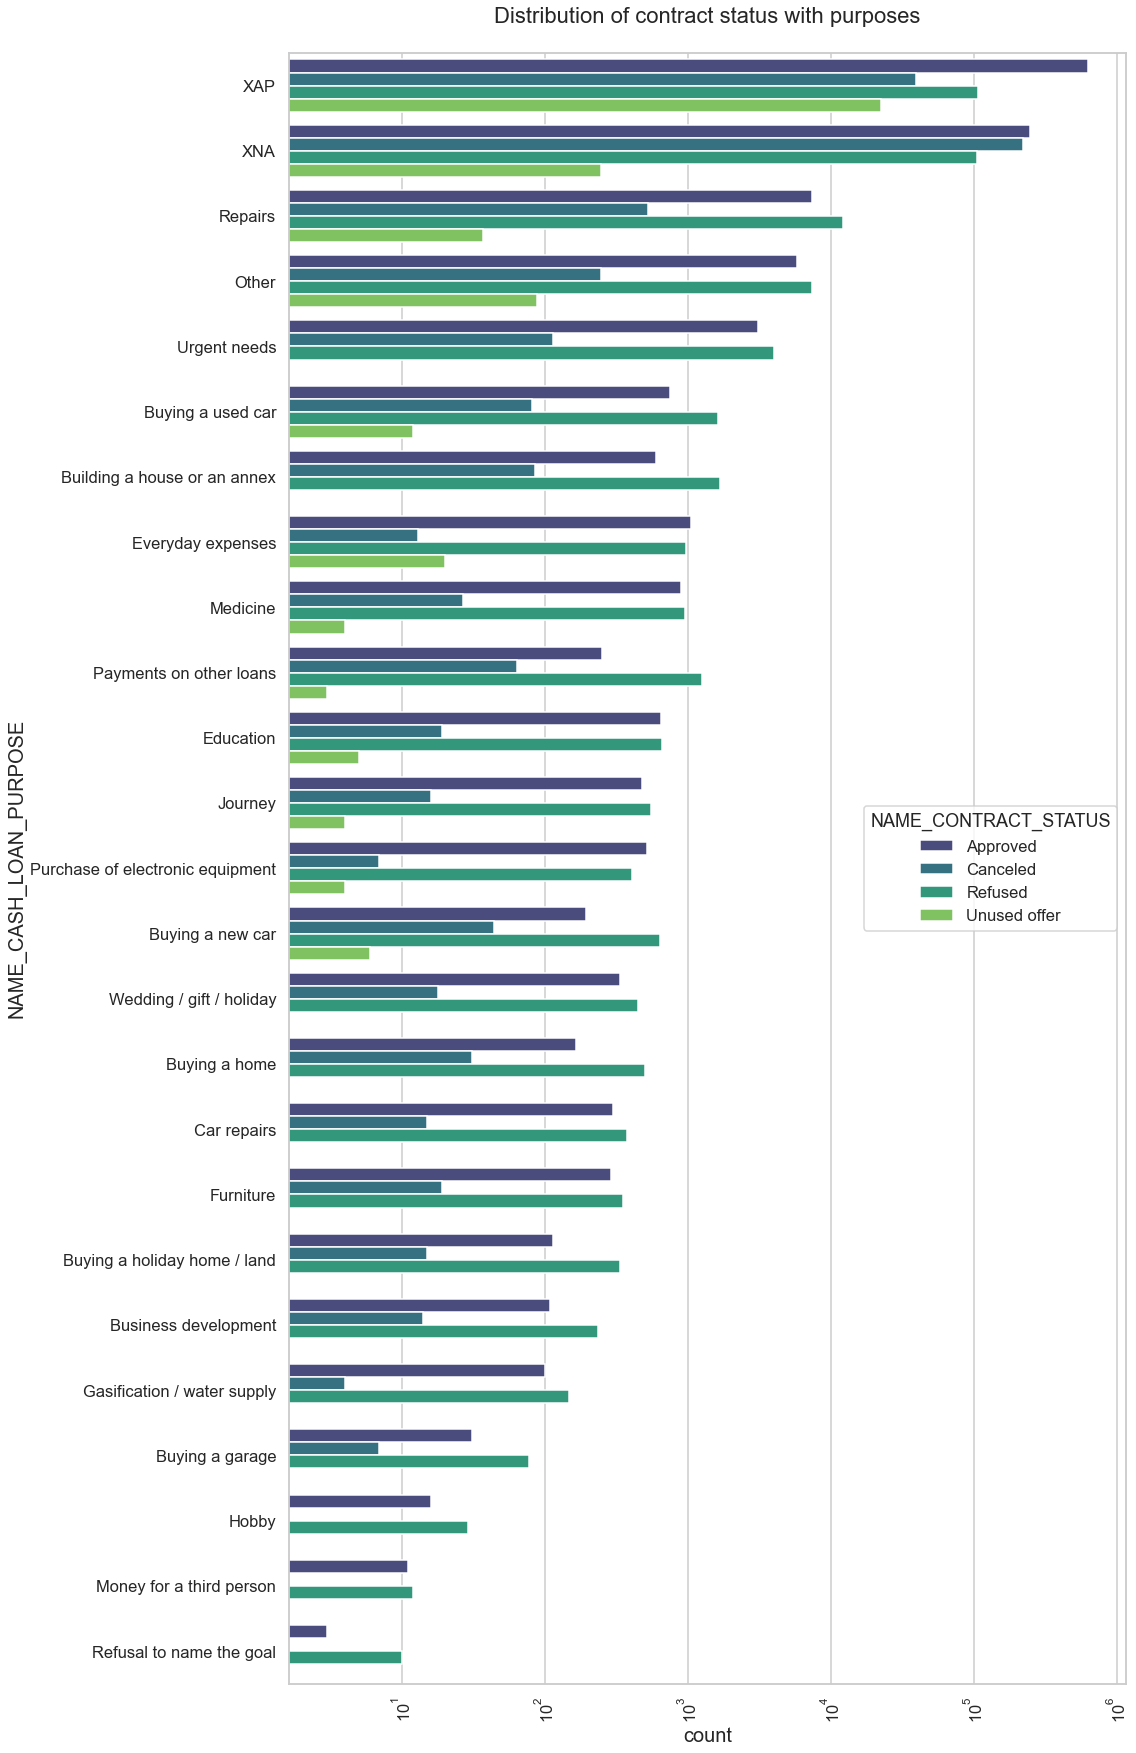

In [196]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = NApp1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=NApp1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='viridis')

#### Insights from the above graph

1. 'Repairs' category shows more loan acceptance rate. Next comes loans for 'other' and 'urgent needs'. 'Buying a used car', 'building a house', 'everyday expenses', 'medicinal purpose', and 'education', show a similar profile for loan acceptance. Again, people who haven't specified their goals see the least acceptance rate.
2. Loan refusal rate is lowest in the category of 'refusal to name the goal'. That might be influenced by a lower percentage of applicants in that category to begin with. Refusal rates are usually lower than acceptance rates for some categories, except 'buying a used car', 'building a house', 'for other loan repayment', 'buying a new car', 'buying a home', 'buying a holiday home/land', 'buisness development', 'hobby', and 'buying a garage'.
3. Cancellation rates almost always follow the acceptance rate profile, apart from a few exceptions like 'everyday expenses', 'medicine', and so on.
4. Similarly, when it comes to the offer remaining unused by the applicant, 'Other' and 'Repairs' category has the most such applicants.

NOTE: XAP, XNA signify that either the purpose was not shared or the bank is not sure of the purpose. Basically, we are not sure about this category as these values are just placeholders.


### Getting into Bivariate analysis using the combined dataset

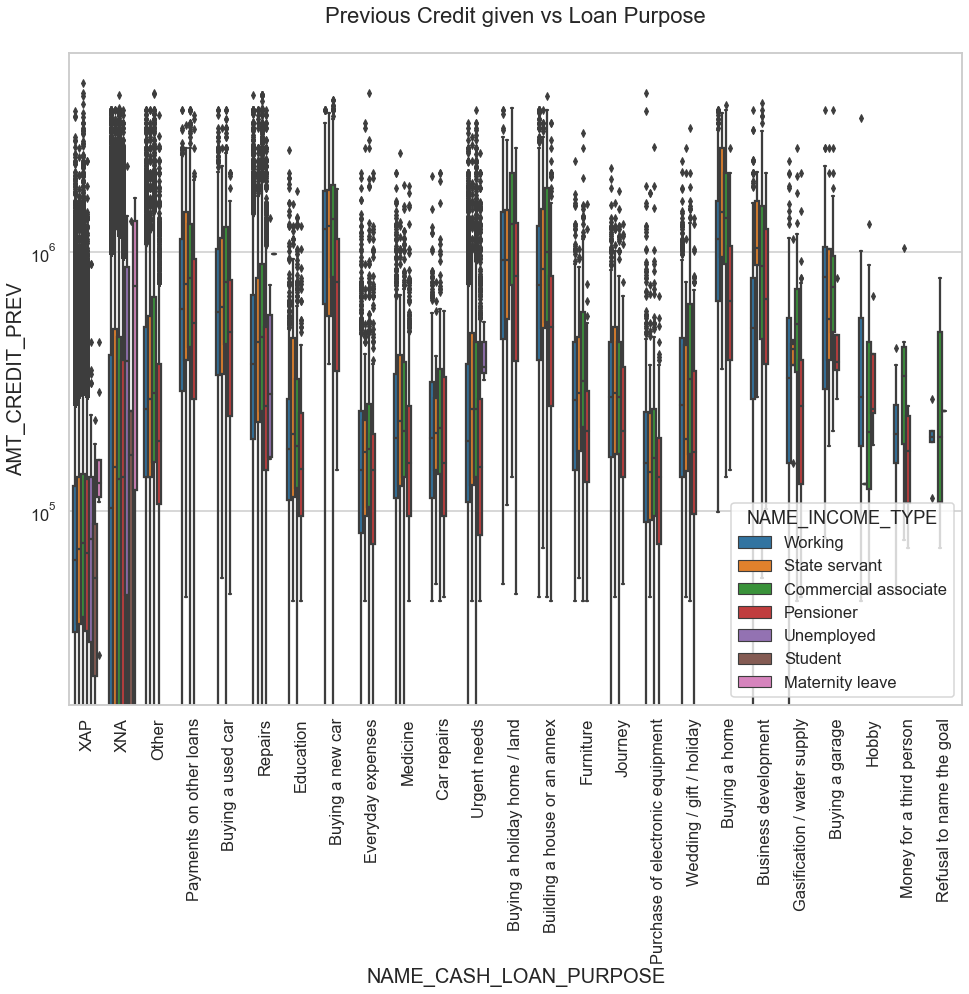

In [197]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =NApp1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Previous Credit given vs Loan Purpose')
plt.show()

#### Insights from the above graph
1. The starting bracket of credit offered previously to all income type categories is high for purposes like 'car repairs', 'buying a holiday home', 'building a house/annex', 'furniture', 'buying a home', 'buying a garage', 'hobby', and 'money for a third person'.
2. Highest amount of anomalies/outliers in the terms of credit amount paid previously lies in 'urgent needs', and 'everyday expenses'.
3. State servants were offered more credits for the purpose of buying a home.
4. Pensioners and students are offered less credit amounts overall.

NOTE: XAP, XNA signify that either the purpose was not shared or the bank is not sure of the purpose. Basically, we are not sure about this category as these values are just placeholders.


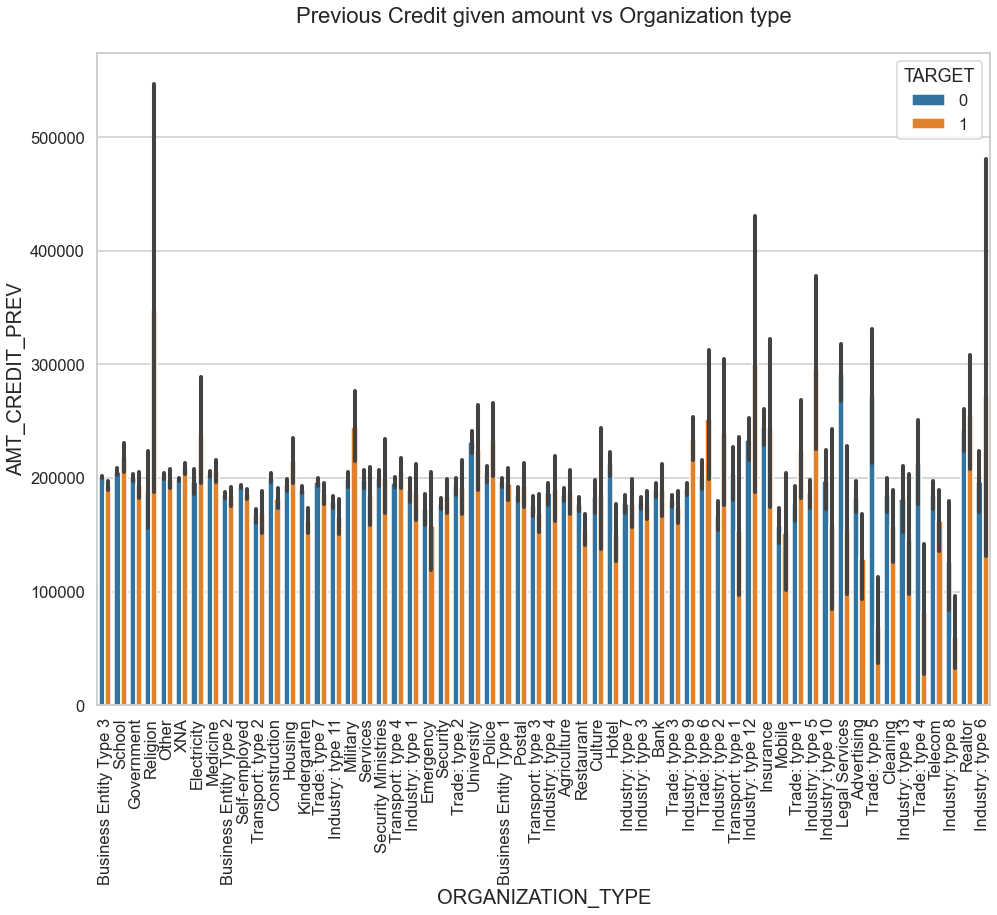

In [198]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =NApp1, y='AMT_CREDIT_PREV',hue='TARGET',x='ORGANIZATION_TYPE')
plt.title('Previous Credit given amount vs Organization type')
plt.show()

#### Insights from the above graph
1. MOst credit amount offered to non-defaulters (blue) is for the organization type 'legal services'
2. If we look for a similar profile for defaulters (orange), it is in the organization type 'industy: type 5'
3. Lowest credit amount offered to defaulters is in the category 'trade: type 4'
4. Similar profile for non-defaulters can be seen in category 'industry: type 8'

NOTE: XAP, XNA signify that either the purpose was not shared or the bank is not sure of the purpose. Basically, we are not sure about this category as these values are just placeholders.


## Concluding remarks:
- Revolving loans prove to be more beneficial for the lender
- Commercial associates, pensioners, state servants, and students are some of the categories where banks should focus more, as they prove to default less
- At the same time banks should lean more towards those with a higher education, academic degree
- New portfolios can be designed for married applicants as they apply for loan more yet default loan
- New offers should be designed by keeping the laborer class in mind as they default less
- Organization type can be tied with loan repayment but not with the defaulting rate